# Leads Scoring Case Study

Problem Statement:

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. 
Through this process, some of the leads get converted while most do not. 
The typical lead conversion rate at X education is around 30%. 
Although X Education gets a lot of leads, its lead conversion rate is very poor.
The company wishes to identify the most potential leads, also known as ‘Hot Leads’.

Need to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. 

Goals of the Case Study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Step 1. Reading and Understanding the data

In [1]:
#import all necessary python libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#To display all columns and rows, of the dataset upto max 200.
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

In [3]:
# Load the dataset into 'lead' dataframe and verifying if it has loaded by calling head().
lead = pd.read_csv('Leads.csv')
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
#Finding the dimensions of the dataset
lead.shape

(9240, 37)

In [5]:
#Finding the statistical aspects of the dataset
lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
#Finding the summary of the datatypes of the dataset .
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data Pre-processing

In [7]:
#Checking the column 'Prospect ID' for duplicates
sum(lead.duplicated(subset = 'Prospect ID')) == 0

True

In [8]:
#Checking the column 'Lead Number' for duplicates
sum(lead.duplicated(subset = 'Lead Number')) == 0

True

No duplicates exist in Prospect ID and Lead number But these are of no use to the model so lets drop these two columns.

In [9]:
#Dropping the columns which have no relation to the target variable.
lead.drop(['Prospect ID'],axis=1, inplace = True)
lead.drop(['Lead Number'],axis=1, inplace = True)

In [10]:
#check data frame for change in number of columns,after dropping
lead.shape

(9240, 35)

#### Missing value imputation and outlier analysis

In [11]:
#Missing value analysis.
lead.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [12]:
#Checking the percentage of null values in each column

round(100*(lead.isnull().sum()/len(lead.index)), 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
I agree to pay the amount through cheque          0.00
A free cop

From the info above we can see that there are many columns with huge missing values. Lets start by removing the columns with missing values >=40%. 

But before that checking the info in the data dictionary regarding the columns containing missing values>=40% to understand if they are anyway possibly related to target variable.If we feel they are related, we need to keep those columns anyway.

In [13]:
# Dropping the columns which have missing values more than 40%.
lead.drop(['Lead Quality'], axis = 1, inplace = True)
lead.drop(['Asymmetrique Activity Index'], axis = 1, inplace = True)
lead.drop(['Asymmetrique Profile Score'], axis = 1, inplace = True)
lead.drop(['Asymmetrique Profile Index'], axis = 1, inplace = True)
lead.drop(['Asymmetrique Activity Score'], axis = 1, inplace = True)

In [14]:
#Lets check the shape of the dataset to see if the columns are dropped or not.
lead.shape

(9240, 30)

In [15]:
#Lets look at the dataset once again
lead.head(10)

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   
5                      API      Olark Chat           No          No   
6  Landing Page Submission          Google           No          No   
7                      API      Olark Chat           No          No   
8  Landing Page Submission  Direct Traffic           No          No   
9                      API          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   
5          0          0.0                            0                   0.0   
6          1          2.0                         1640                   2.0   
7          0          0.0                            0                   0.0   
8          0          2.0                           71                   2.0   
9          0          4.0                           58                   4.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website     NaN                   Select   
1             Email Opened   India                   Select   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                   Select   
5  Olark Chat Conversation     NaN                      NaN   
6             Email Opened   India  Supply Chain Management   
7  Olark Chat Conversation     NaN                      NaN   
8             Email Opened   India   IT Projects Management   
9             Email Opened   India       Finance Management   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   
5                                NaN                             NaN   
6                      Online Search                      Unemployed   
7                                NaN                             NaN   
8                                NaN                             NaN   
9                      Word Of Mouth                             NaN   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   
5                                           NaN     No       No   
6                       Better Career Prospects     No       No   
7                                           NaN     No       No   
8                                           NaN     No       No   
9                                           NaN     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No     

We can see that many columns have value called 'Select' which means that students/customer have not selected any option for those fields/columns. Lets impute 'Select' with nan and check the total number of missing values again.

In [16]:
# Replacing 'Select' values with Nan
lead=lead.replace("Select", np.nan)

In [17]:
#Checking the percentage of null values in each column

round(100*(lead.isnull().sum()/len(lead.index)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Through Recommendations                           0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Receive Mo

As we can see above there are two columns with huge number of missing values.i.e. values greater than 40%.So lets drop those two columns.

In [18]:
# Dropping the columns which have missing values more than 40%.
lead.drop(['How did you hear about X Education'], axis = 1, inplace = True)
lead.drop(['Lead Profile'], axis = 1, inplace = True)

In [19]:
#Lets check the shape of the dataset to see if the columns are dropped or not.
lead.shape

(9240, 28)

In [20]:
# Checking if there are any columns with only one unique value since dropping those won't affect our analysis.
lead.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

There are 5 columns with single unique value or which are constant across all rows,so we can remove those columns as they dont add any value to the model.

In [21]:
#Dropping the 5 columns which have single unique value.
lead.drop(['Magazine'], axis = 1, inplace = True)
lead.drop(['Receive More Updates About Our Courses'], axis = 1, inplace = True)
lead.drop(['Update me on Supply Chain Content'], axis = 1, inplace = True)
lead.drop(['Get updates on DM Content'], axis = 1, inplace = True)
lead.drop(['I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [22]:
#Lets check the shape of the dataset to see if the columns are dropped or not.
lead.shape

(9240, 23)

In [23]:
#Checking the percentage of null values in each column again
round(100*(lead.isnull().sum()/len(lead.index)), 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Lead Origin                                       0.00
Newspaper Article                                 0.00
Search                                            0.00
Total Time

From above missing value analysis, we can see that there are still few columns which have significant missing values even though they are less than 40%. 
Lets replace the categorical columns with mode and numerical columns with mean/median.

In [24]:
#Storing all numerical datatypes into 'Numerical_columns'
Numerical_columns=lead.select_dtypes(include=['int64','float64']).columns.tolist()

In [25]:
Numerical_columns

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [26]:
#Storing all categorical datatypes into 'Categorical_columns'
Categorical_columns=lead.select_dtypes(include=['object']).columns.tolist()

In [27]:
Categorical_columns

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [28]:
for i in Categorical_columns:
    print(i)
    print('----------------xxxxxxxxxxxxxxxxxxxx------------------')
    print(lead[i].value_counts())
    print('--------------------------------------')
    print("percentage\n",100*lead[i].value_counts(normalize=True))
    print('----------------xxxxxxxxxxxxxxxxxxxx------------------\n\n')

Lead Origin
----------------xxxxxxxxxxxxxxxxxxxx------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
--------------------------------------
percentage
 Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
----------------xxxxxxxxxxxxxxxxxxxx------------------


Lead Source
----------------xxxxxxxxxxxxxxxxxxxx------------------
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat

In [29]:
for i in Numerical_columns:
    print(i)
    print('----------------xxxxxxxxxxxxxxxxxxxx------------------')
    print(lead[i].value_counts())
    print('--------------------------------------')
    print("percentage\n",100*lead[i].value_counts(normalize=True))
    print('----------------xxxxxxxxxxxxxxxxxxxx------------------\n\n')

Converted
----------------xxxxxxxxxxxxxxxxxxxx------------------
0    5679
1    3561
Name: Converted, dtype: int64
--------------------------------------
percentage
 0    61.461039
1    38.538961
Name: Converted, dtype: float64
----------------xxxxxxxxxxxxxxxxxxxx------------------


TotalVisits
----------------xxxxxxxxxxxxxxxxxxxx------------------
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64
--------------------------------------
per

In [30]:
# Replacing the null values in categorical columns by mode of that respective the colmun
for i in Categorical_columns:
    if lead[i].isnull().sum()>0:
        value=lead[i].mode()[0]
        lead[i]=lead[i].fillna(value)

In [31]:
# Replacing the null values in numerical columns by median of that respective the colmun
for i in Numerical_columns:
    if lead[i].isnull().sum()>0:   
        value=lead[i].median()
        lead[i]=lead[i].fillna(value)

In [32]:
# Verifying if all the null values have been replaced or not.

round(100*(lead.isnull().sum()/len(lead.index)), 2).sort_values(ascending=False)

Lead Origin                                      0.0
What matters most to you in choosing a course    0.0
A free copy of Mastering The Interview           0.0
City                                             0.0
Tags                                             0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What is your current occupation                  0.0
Lead Source                                      0.0
Specialization                                   0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                      0.0
TotalVisits                                   

In [33]:
#Dropping all the columns who have a single value weighing >95% in them , since keeping them makes the data skewed, lets drop them.
print(lead["Do Not Call"].value_counts(normalize=True))
lead.drop(['Do Not Call'], axis = 1, inplace = True)
print("---------------------------------------------")
print(lead["Country"].value_counts(normalize=True))
lead.drop(['Country'], axis = 1, inplace = True)
print("---------------------------------------------")
print(lead["What matters most to you in choosing a course"].value_counts(normalize=True))
lead.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)
print("---------------------------------------------")
print(lead["Search"].value_counts(normalize=True))
lead.drop(['Search'], axis = 1, inplace = True)
print("---------------------------------------------")
print(lead["Newspaper Article"].value_counts(normalize=True))
lead.drop(['Newspaper Article'], axis = 1, inplace = True)
print("---------------------------------------------")
print(lead["X Education Forums"].value_counts(normalize=True))
lead.drop(['X Education Forums'], axis = 1, inplace = True)
print("---------------------------------------------")
print(lead["Newspaper"].value_counts(normalize=True))
lead.drop(['Newspaper'], axis = 1, inplace = True)
print("---------------------------------------------")
print(lead["Digital Advertisement"].value_counts(normalize=True))
lead.drop(['Digital Advertisement'], axis = 1, inplace = True)
print("---------------------------------------------")
print(lead["Through Recommendations"].value_counts(normalize=True))
lead.drop(['Through Recommendations'], axis = 1, inplace = True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64
---------------------------------------------
India                   0.968939
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
South Africa            0.000433
Nigeria                 0.000433
Germany                 0.000433
Kuwait                  0.000433
Canada                  0.000433
Sweden                  0.000325
China                   0.000216
Asia/Pacific Region     0.000216
Uganda                  0.000216
Bangladesh              0.000216
Italy                   0.000216
Belgium                 0.000216
Netherlands             0.000216
Ghana                   0.0002

#### Converting few columns with binary variables (Yes/No) to 0/1.

In [34]:
# Two columns with binary variables are:
print(lead["Do Not Email"].value_counts())
print(lead["A free copy of Mastering The Interview"].value_counts())

No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


In [35]:
# Replacing the values of yes with 1 and No with 0.
lead["Do Not Email"].replace(to_replace = "No" , value = 0 , inplace = True)
lead["Do Not Email"].replace(to_replace = "Yes" , value = 1 , inplace = True)
lead["A free copy of Mastering The Interview"].replace(to_replace = "No" , value = 0 , inplace = True)
lead["A free copy of Mastering The Interview"].replace(to_replace = "Yes" , value = 1 , inplace = True)

In [36]:
# checking if the values of the data are changed to 0,1.
lead.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website       Finance Management   
1             Email Opened       Finance Management   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead       Finance Management   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

     City  A free copy of Mastering The Interview Last Notable Activity  
0  Mumbai                                       0              Modified  
1  Mumbai                                       0          Email Opened  
2  Mumbai                                       1          Email Opened  
3  Mumbai                                       0              Modified  
4  Mumbai                                       0              Modified

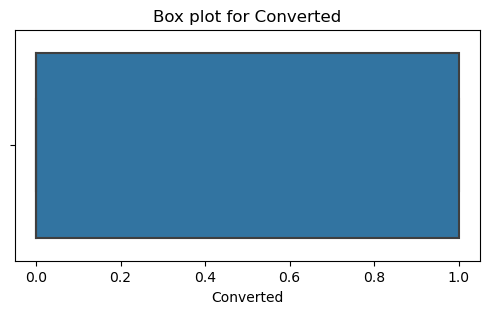

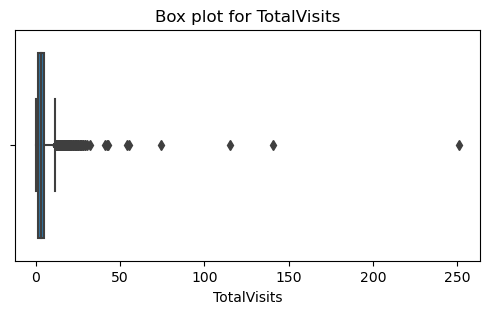

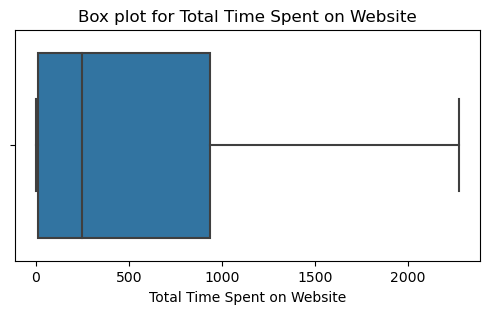

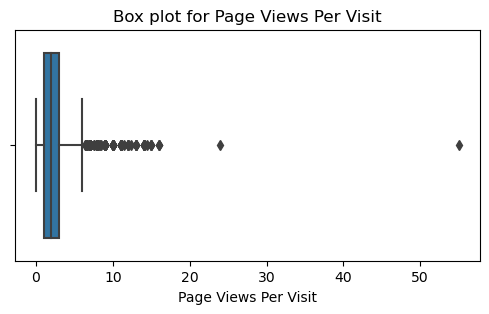

In [37]:
#Outlier analysis
for i in Numerical_columns: 
    plt.figure(figsize=(6,3)) 
    sns.boxplot(data=lead,x=i)
    plt.title('Box plot for '+i)
    plt.show()

Since there are outliers in the data,lets clean them.

In [38]:
# Checking data at 25%,50%,75%,90%,95% and above.
lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Do Not Email    Converted  TotalVisits  Total Time Spent on Website  \
count   9240.000000  9240.000000  9240.000000                  9240.000000   
mean       0.079437     0.385390     3.438636                   487.698268   
std        0.270435     0.486714     4.819024                   548.021466   
min        0.000000     0.000000     0.000000                     0.000000   
25%        0.000000     0.000000     1.000000                    12.000000   
50%        0.000000     0.000000     3.000000                   248.000000   
75%        0.000000     1.000000     5.000000                   936.000000   
90%        0.000000     1.000000     7.000000                  1380.000000   
95%        1.000000     1.000000    10.000000                  1562.000000   
99%        1.000000     1.000000    17.000000                  1840.610000   
max        1.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  A free copy of Mastering The Interview  
count           9240.000000                             9240.000000  
mean               2.357440                                0.312554  
std                2.145781                                0.463559  
min                0.000000                                0.000000  
25%                1.000000                                0.000000  
50%                2.000000                                0.000000  
75%                3.000000                                1.000000  
90%                5.000000                                1.000000  
95%                6.000000                                1.000000  
99%                9.000000                                1.000000  
max               55.000000                                1.000000

In [39]:
# Lets cap the values for 95% to handle the outliers in both the columns - 'TotalVisits' and 'Page Views Per Visit'
total_visits = lead['TotalVisits'].quantile(0.99)
lead = lead[lead["TotalVisits"] < total_visits]
page_visits = lead['Page Views Per Visit'].quantile(0.99)
lead = lead[lead["Page Views Per Visit"] < page_visits]

In [40]:
# Re-Checking data at 25%,50%,75%,90%,95% and 99%.
lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Do Not Email    Converted  TotalVisits  Total Time Spent on Website  \
count   9029.000000  9029.000000  9029.000000                  9029.000000   
mean       0.077749     0.385092     3.087164                   483.133016   
std        0.267792     0.486644     2.801244                   547.420675   
min        0.000000     0.000000     0.000000                     0.000000   
25%        0.000000     0.000000     1.000000                     7.000000   
50%        0.000000     0.000000     3.000000                   245.000000   
75%        0.000000     1.000000     4.000000                   929.000000   
90%        0.000000     1.000000     7.000000                  1378.000000   
95%        1.000000     1.000000     8.000000                  1558.000000   
99%        1.000000     1.000000    13.000000                  1839.720000   
max        1.000000     1.000000    16.000000                  2272.000000   

       Page Views Per Visit  A free copy of Mastering The Interview  
count           9029.000000                             9029.000000  
mean               2.226383                                0.305682  
std                1.823395                                0.460721  
min                0.000000                                0.000000  
25%                1.000000                                0.000000  
50%                2.000000                                0.000000  
75%                3.000000                                1.000000  
90%                5.000000                                1.000000  
95%                6.000000                                1.000000  
99%                7.000000                                1.000000  
max                8.000000                                1.000000

The data looks less skewed, we can use it to build the model now.

In [41]:
# Lets find the percentage of data retained.

percent_data = round(100*(len(lead)/9240),2)
print(percent_data)

97.72


Max data has been retained, so we can still work on this data to build our model.

## Step 2: Visualising the Data 

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Univariate analysis

In [42]:
#Storing all categorical datatypes into 'Categorical_columns' 
Numerical_columns=lead.select_dtypes(include=['int64','float64']).columns.tolist()

In [43]:
#Storing all categorical datatypes into 'Categorical_columns'
Categorical_columns=lead.select_dtypes(include=['object']).columns.tolist()

In [44]:
Numerical_columns

['Do Not Email',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview']

In [45]:
Categorical_columns

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'Last Notable Activity']

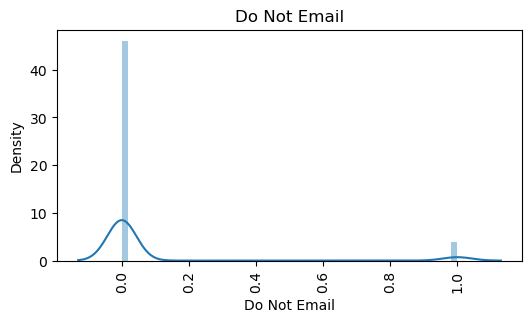

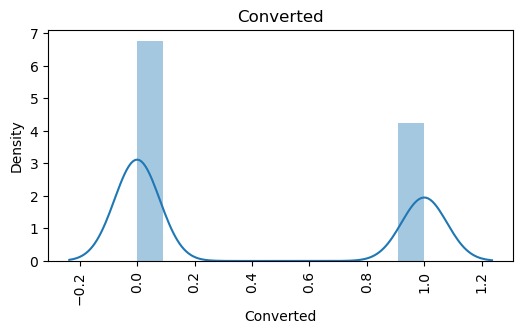

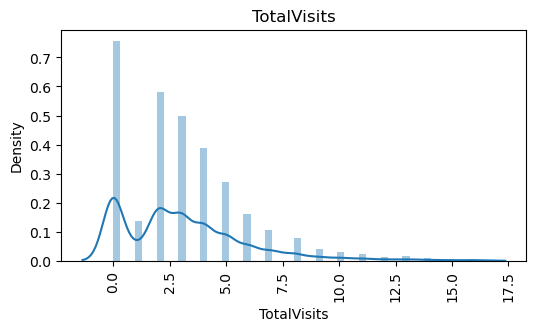

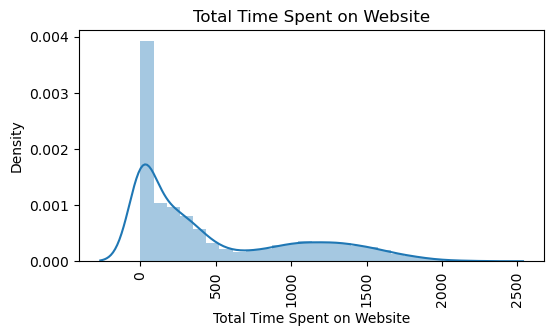

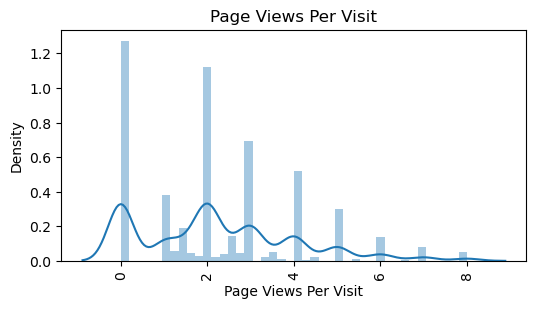

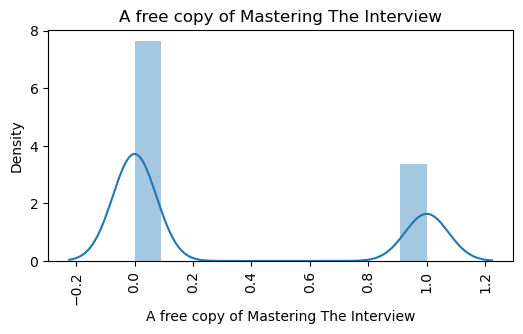

In [46]:
# Univariate analysis for numerical variables.
for i in Numerical_columns: 
        plt.figure(figsize = (6,3))
        plt.subplots_adjust(hspace=0.1)
        sns.distplot(lead[i])
        plt.title(i)
        plt.xticks(rotation=90)
        plt.show()

From the above plots we can see that:

-Most people prefere not to have emails sent to them.    
-The difference between not converted to converted is high.     
-People are most likely to make 2-4 visits to the website.          
-Total time spent on the website is max of 500 minutes.        
-Most people view 2 pages per visit and but very few go upto viewing max 8 pages per visit.    
-Ratio is people not needing the free copy of mastering the interview to people needing them is almost less by half.

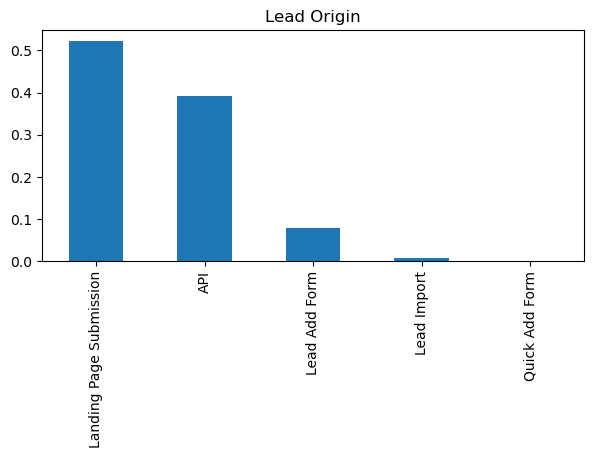

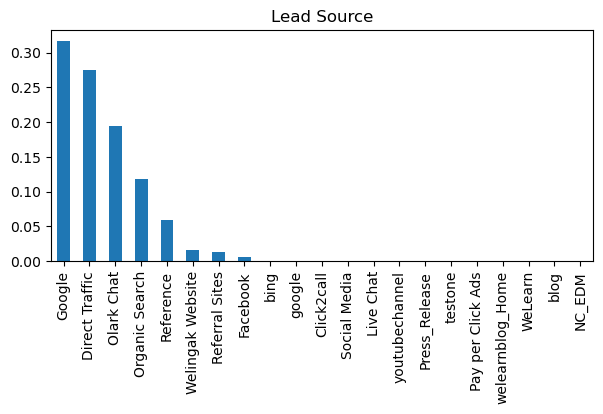

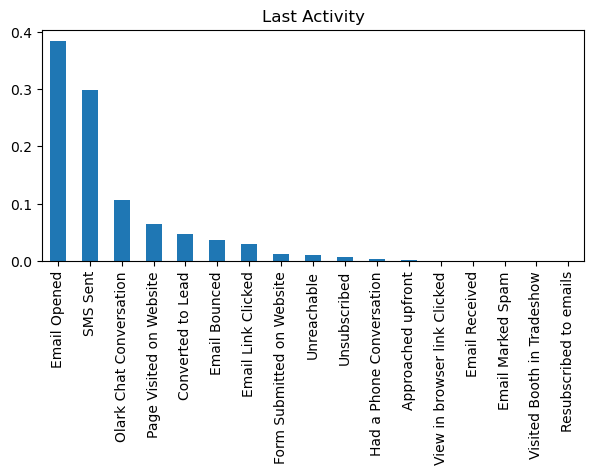

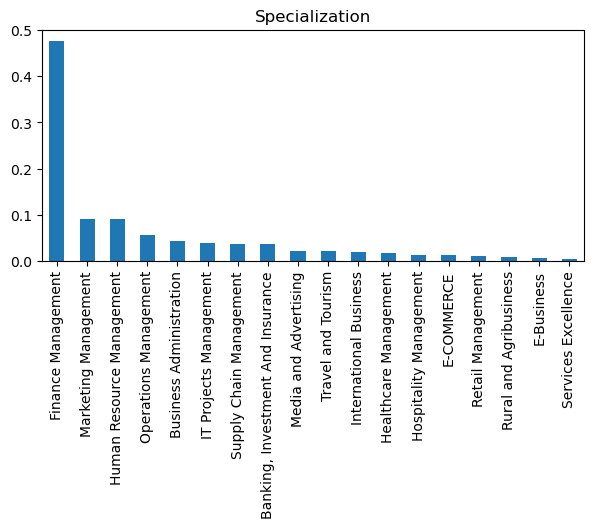

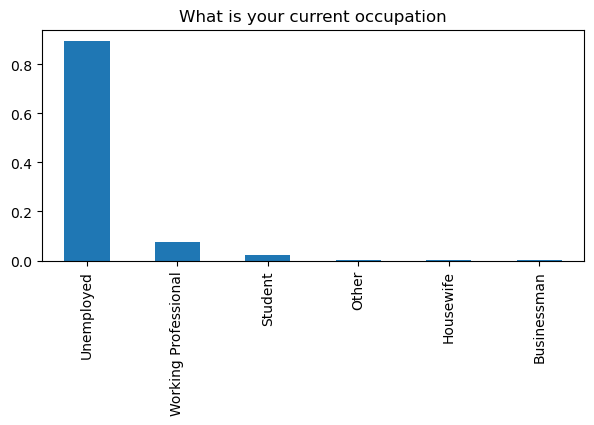

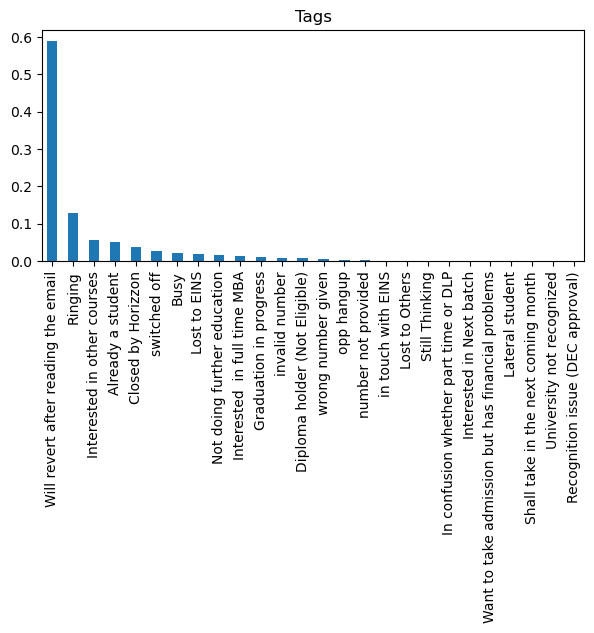

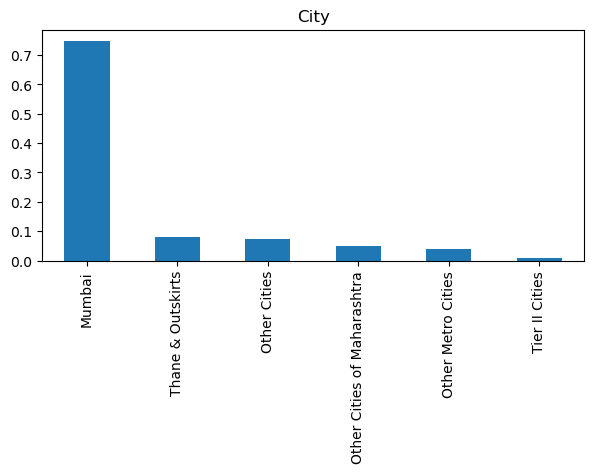

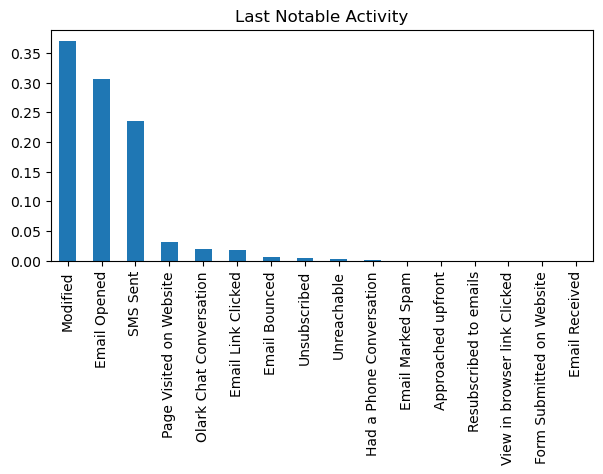

In [47]:
# Univariate analysis for categorical variables.
for i in Categorical_columns: 
        plt.figure(figsize = (7,3))
        plt.subplots_adjust(hspace=0.1)
        lead[i].value_counts(normalize=True).plot.bar()
        plt.title(i)
        plt.xticks(rotation=90)
        plt.show()

From the above plots we can see that:

-Lead origin is mostly from Landing page submission and API, followed by lead add form.    
-Lead Source is mostly from Google, followed by Diredct traffic and Olark charts.     
-Most students/customer last activity is Email opened, followed by SMS Sent and Olark chat conversation. This is same for last notable activity too.
-Customers with specialization as Fianance Management are highest among all.   
-Customers who are highly likely are 'Unemployeed' customers.    
-Mumbai is the city from where most customers are coming from.

#### Bi-variate analysis

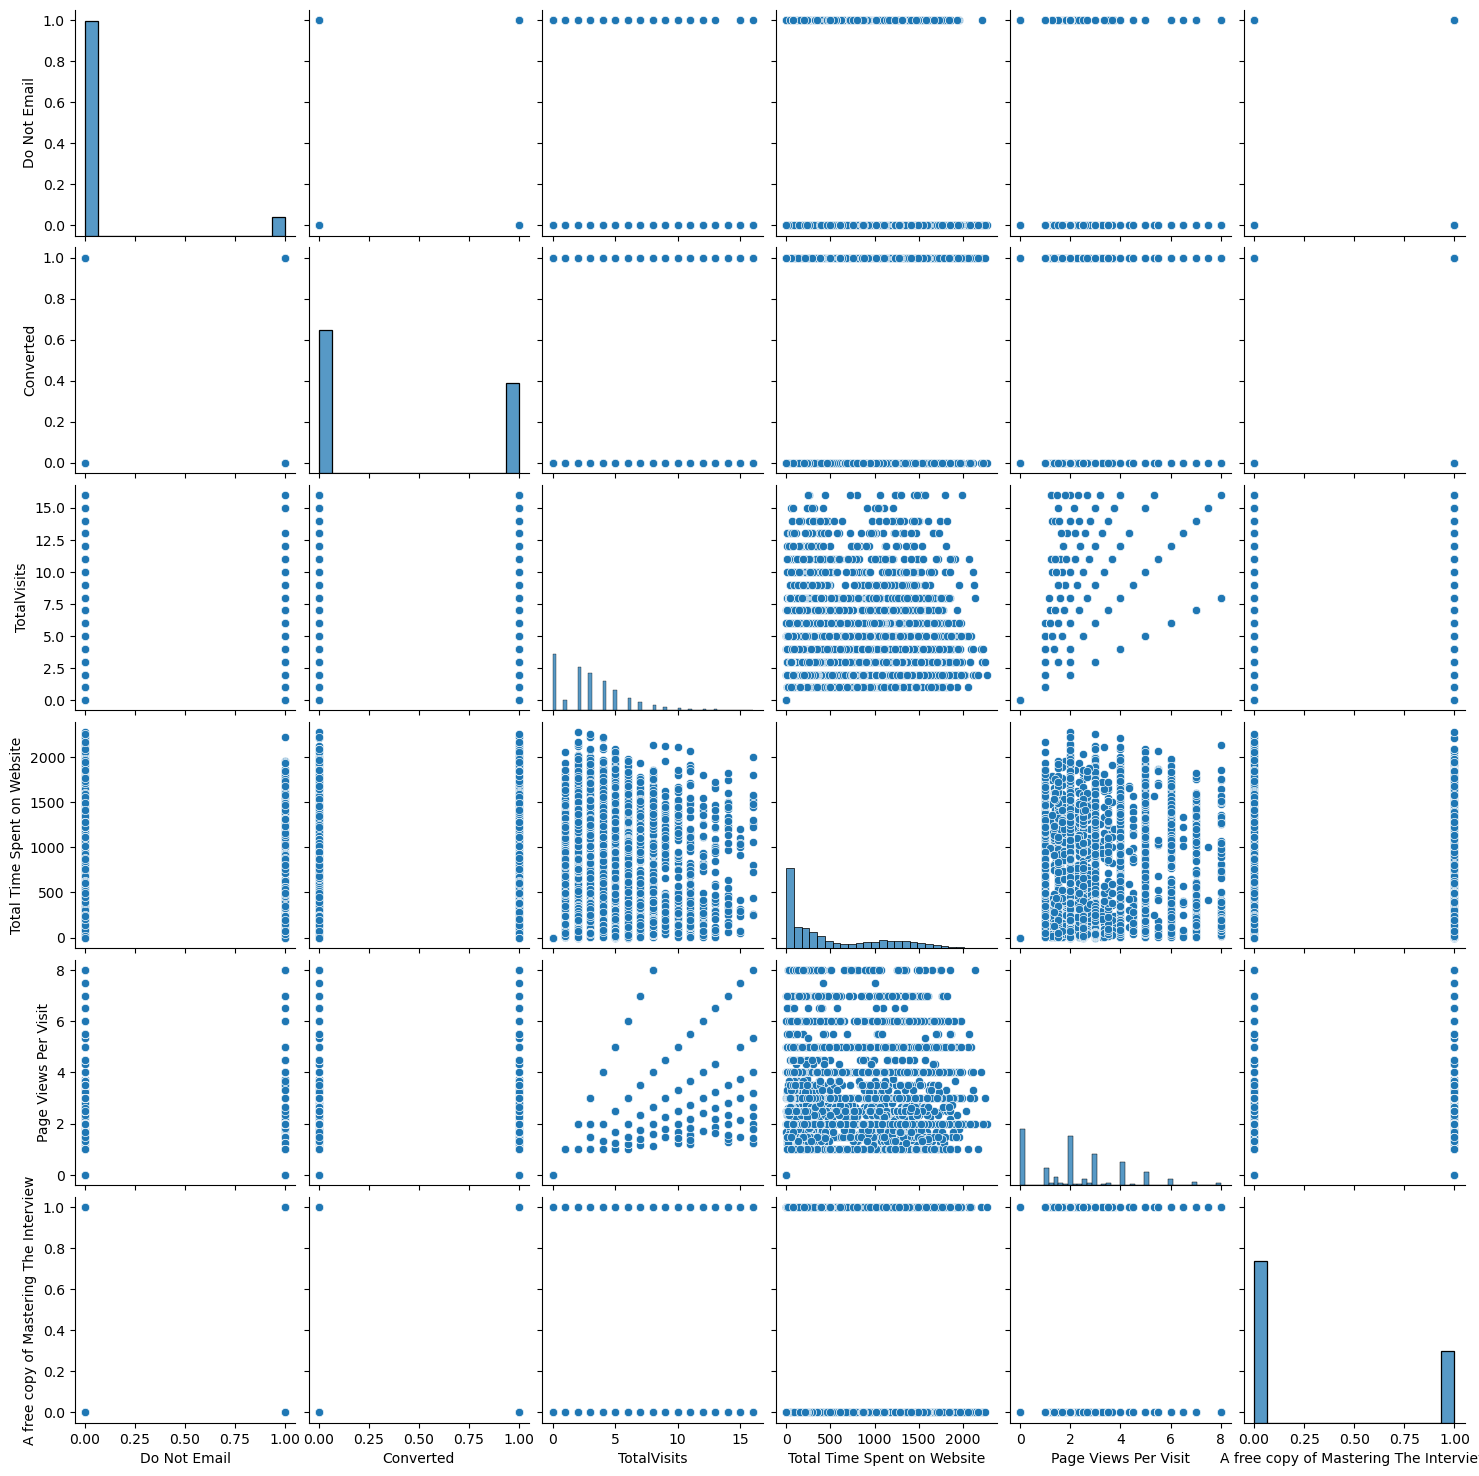

In [48]:
#Bi-variant analysis for numeric variables.
sns.pairplot(data=lead,vars=['Do Not Email','Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit','A free copy of Mastering The Interview'])
plt.show()

##### Bi variant analysis for categorical variables:-

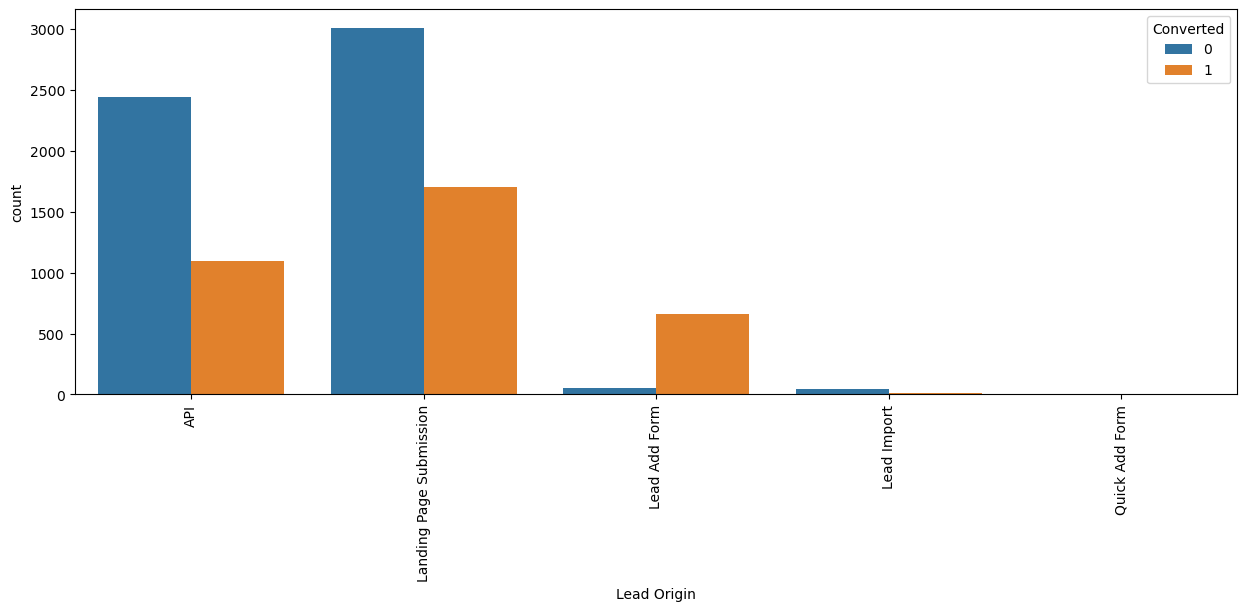

In [49]:
plt.figure(figsize = (15, 5))
sns.countplot(x='Lead Origin', hue = 'Converted', data = lead)
plt.xticks(rotation = 90)
plt.show()

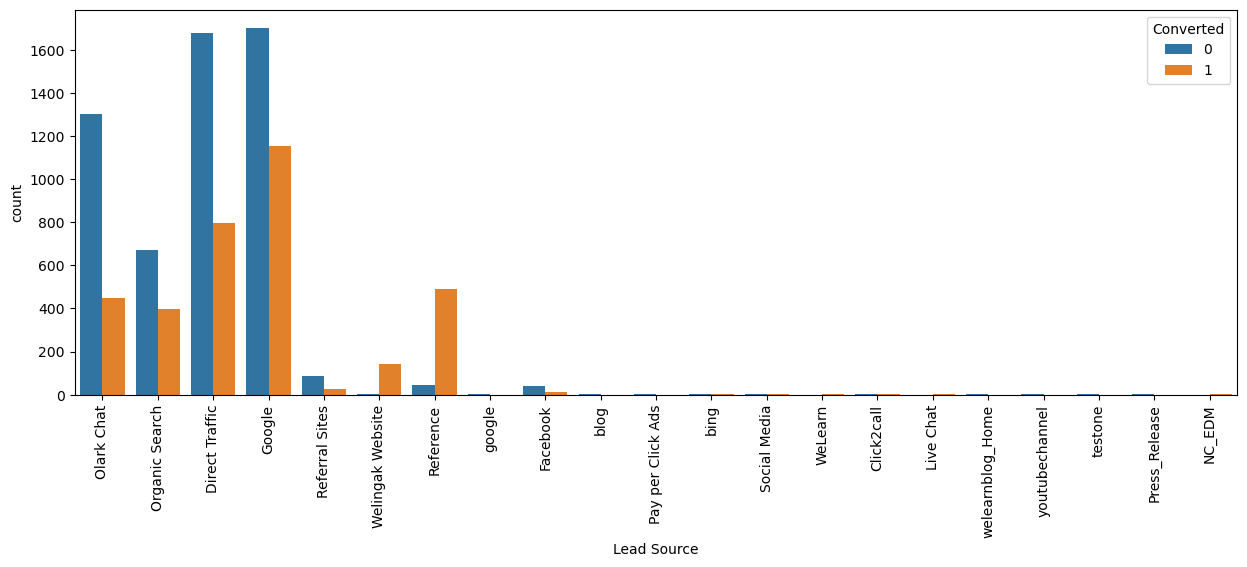

In [50]:
plt.figure(figsize = (15, 5))
sns.countplot(x='Lead Source', hue = 'Converted', data = lead)
plt.xticks(rotation = 90)
plt.show()

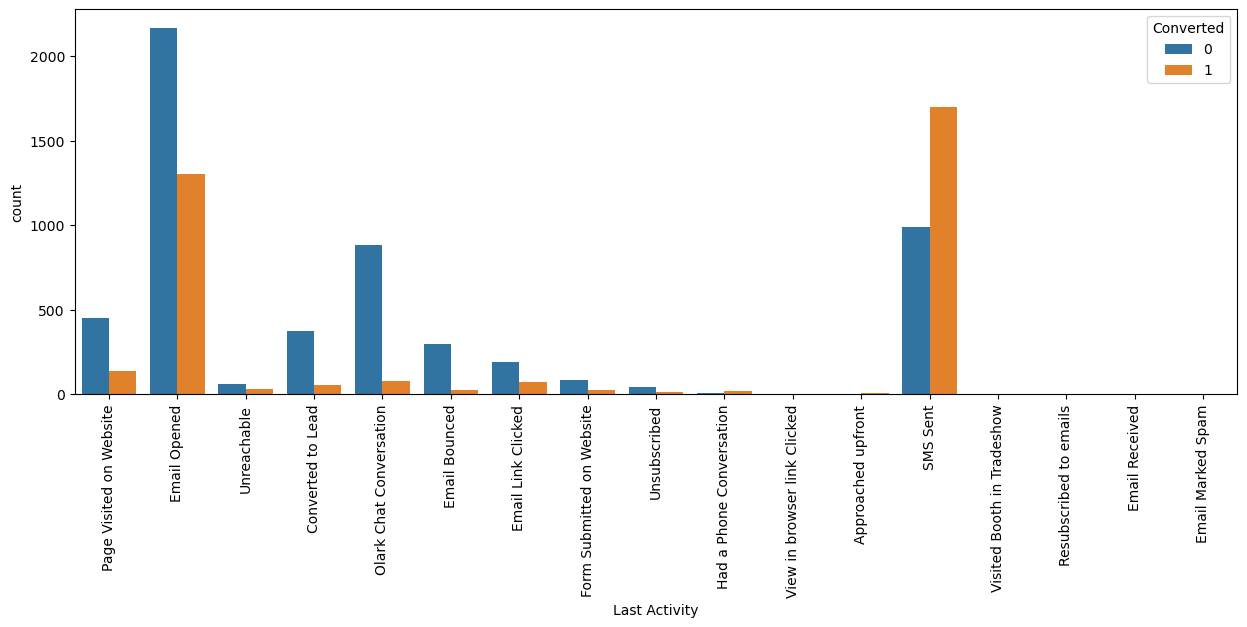

In [51]:
plt.figure(figsize = (15, 5))
sns.countplot(x='Last Activity', hue = 'Converted', data = lead)
plt.xticks(rotation = 90)
plt.show()

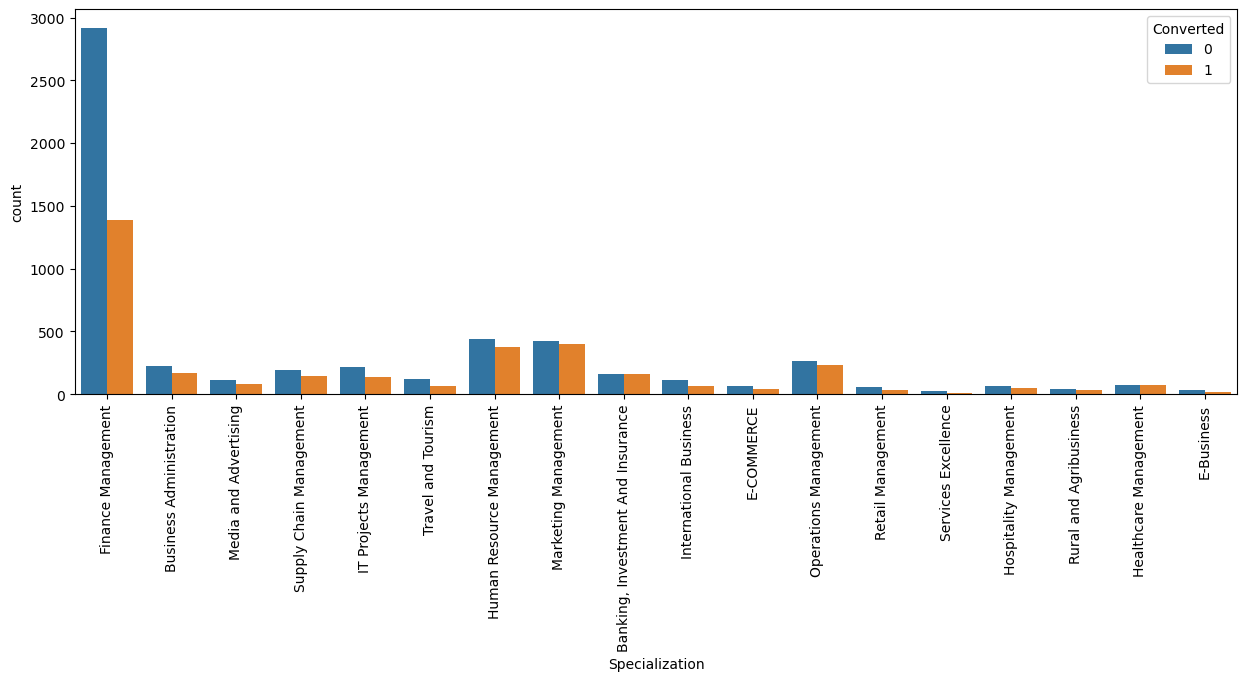

In [52]:
plt.figure(figsize = (15, 5))
sns.countplot(x='Specialization', hue = 'Converted', data = lead)
plt.xticks(rotation = 90)
plt.show()

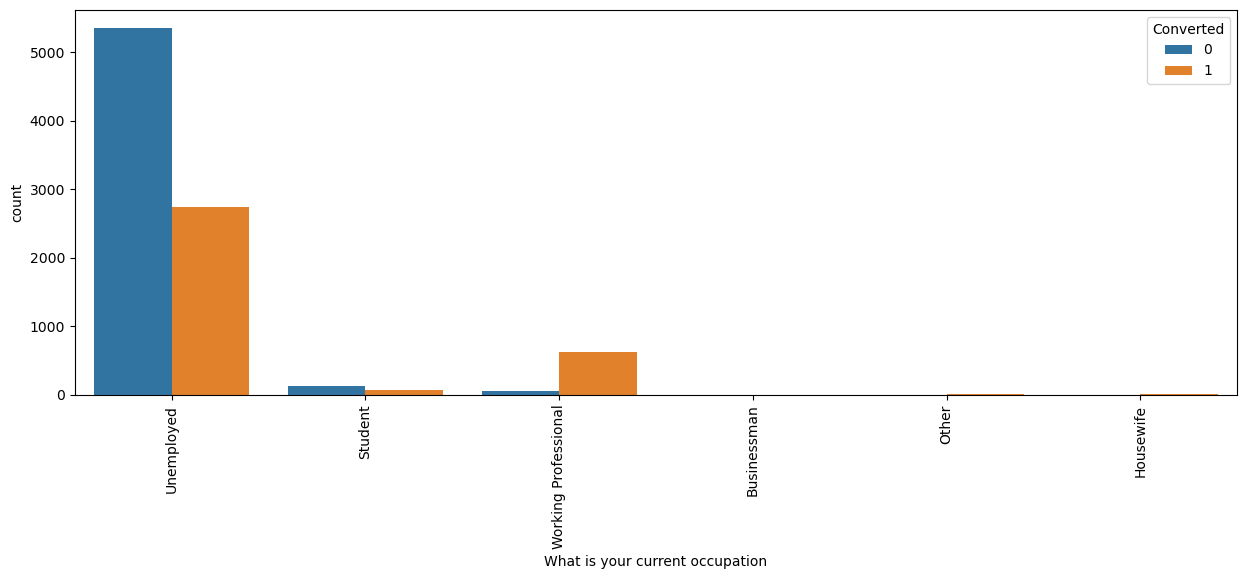

In [53]:
plt.figure(figsize = (15, 5))
sns.countplot(x='What is your current occupation', hue = 'Converted', data = lead)
plt.xticks(rotation = 90)
plt.show()

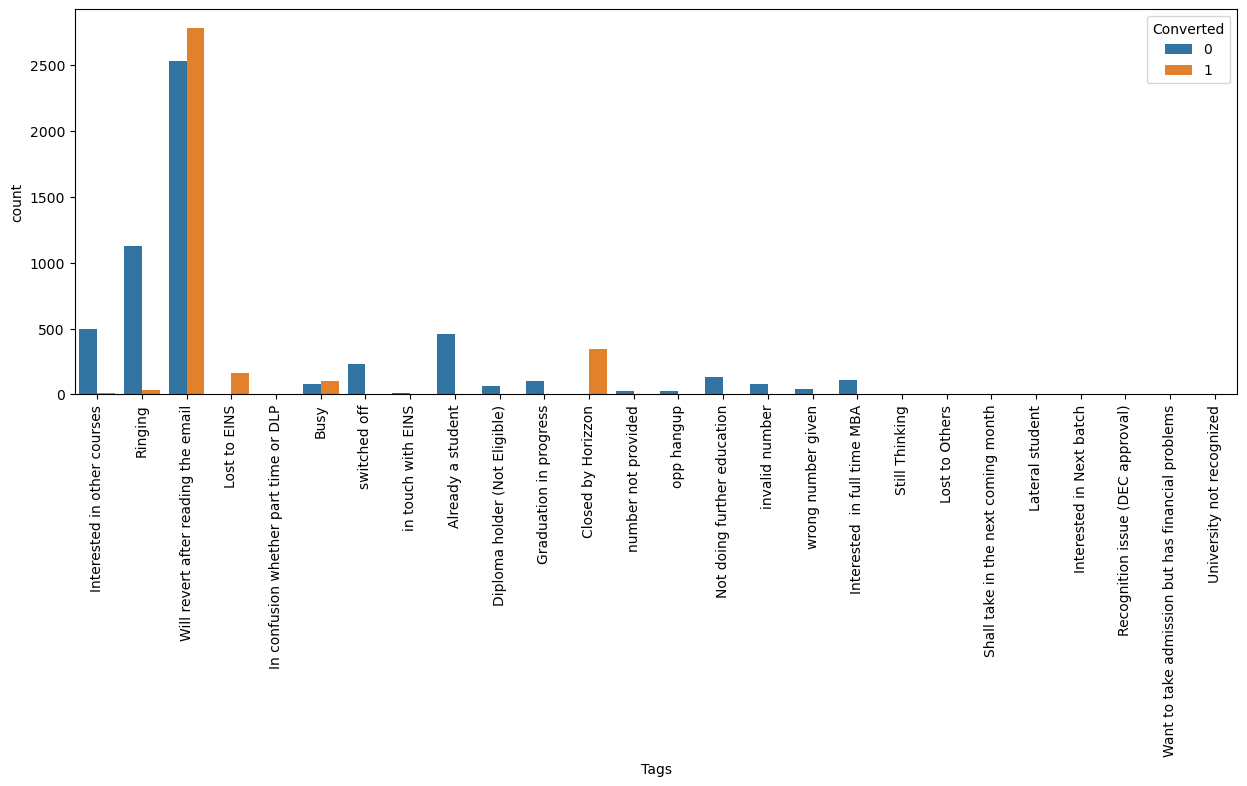

In [54]:
plt.figure(figsize = (15, 5))
sns.countplot(x='Tags', hue = 'Converted', data = lead)
plt.xticks(rotation = 90)
plt.show()

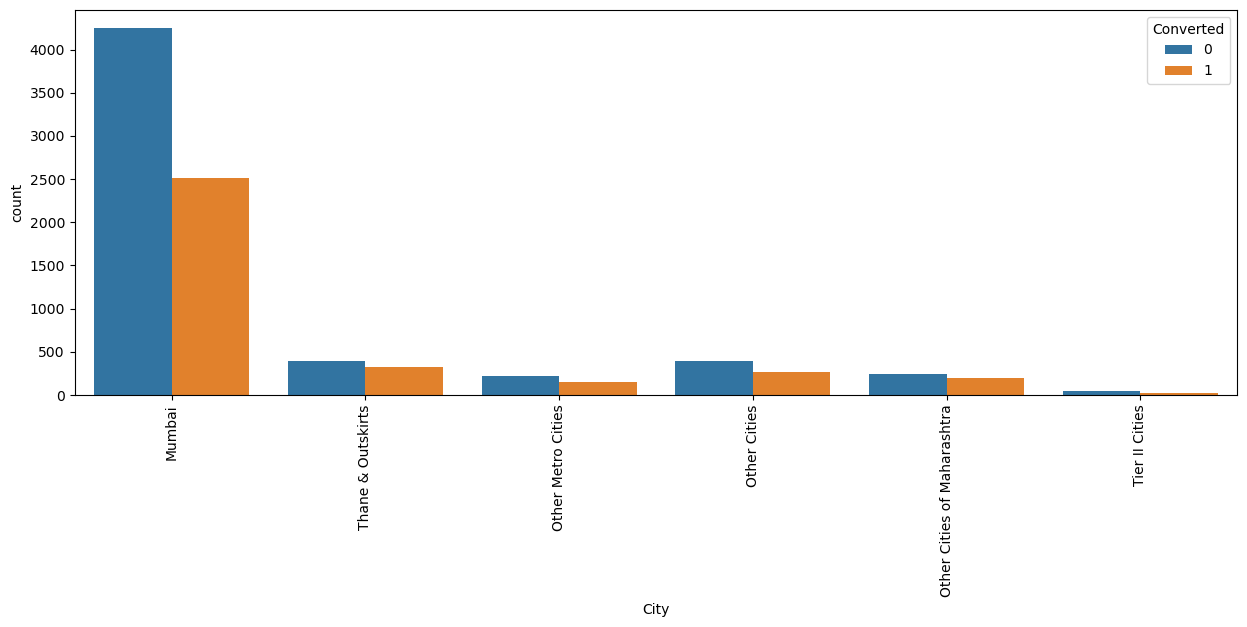

In [55]:
plt.figure(figsize = (15, 5))
sns.countplot(x='City', hue = 'Converted', data = lead)
plt.xticks(rotation = 90)
plt.show()

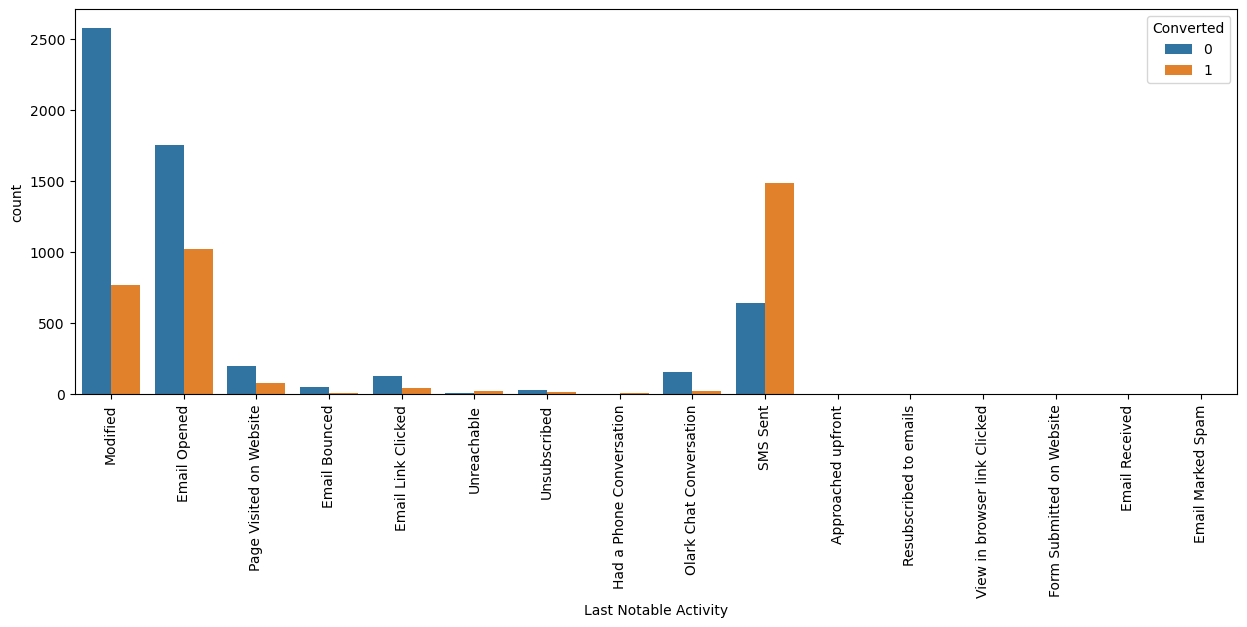

In [56]:
plt.figure(figsize = (15, 5))
sns.countplot(x='Last Notable Activity', hue = 'Converted', data = lead)
plt.xticks(rotation = 90)
plt.show()

From the above plots we can infer that:     
-Leads from source - 'Google' are more likely to get converted to hot lead.      
-Leads with last activity/last notable activity as 'SMS Sent' has highest conversion rate.     
-Tags like 'will revert after reading the email' are also more likely to convert.

#### Multi-variate analysis:

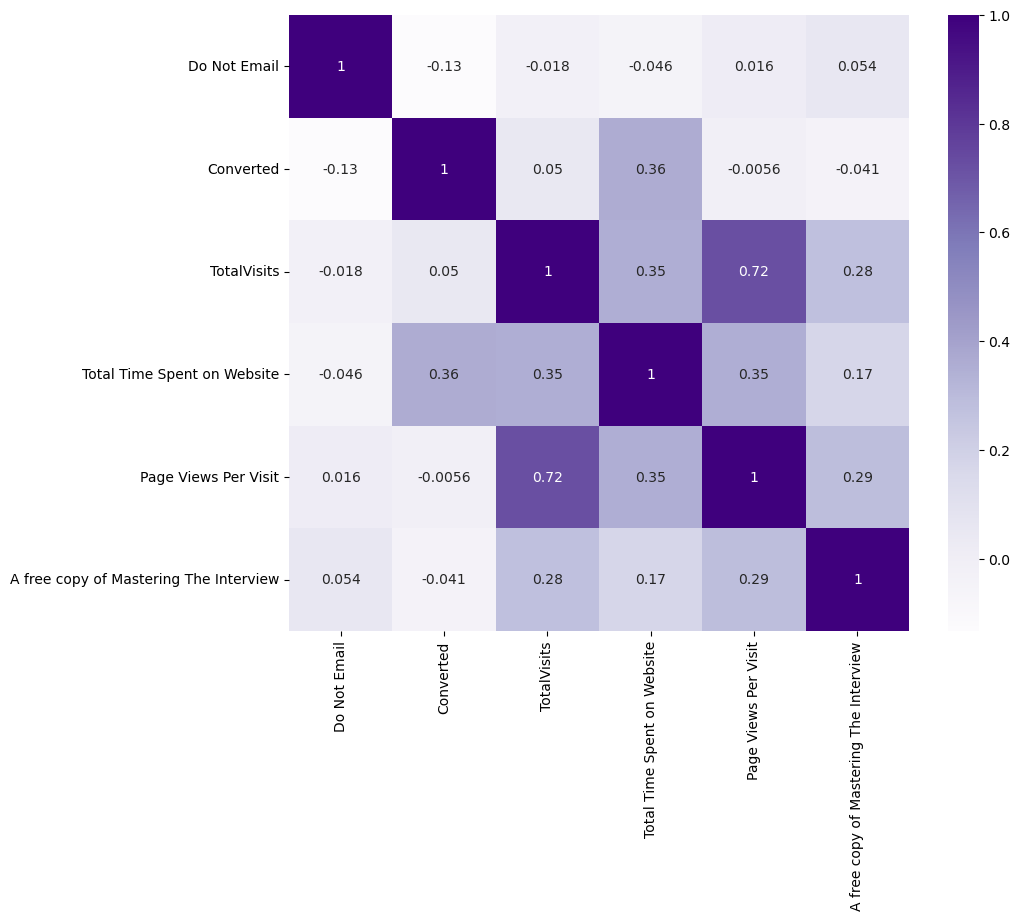

In [57]:
#Checking correlations of numeric values using heatmaps.
plt.figure(figsize=(10,8))
sns.heatmap(lead.corr(), cmap="Purples", annot=True)
plt.show()

From above heatmaps we can infer that:
Total visits and Page views per visit are highly correlated, followed by total time spent on website and converted.

#### Data Imbalance Analysis

In [58]:
# Checking Imbalance of Data Converted_0 == 0(Lead not Converted) Converted_1 == 1(Lead Converted)
Converted_0=lead[lead["Converted"]==0]
Converted_1=lead[lead["Converted"]==1]
print("Shape of all not Converted Leads -", Converted_0.shape)
print("Shape of all Converted Leads -", Converted_1.shape)

Shape of all not Converted Leads - (5552, 14)
Shape of all Converted Leads - (3477, 14)


In [59]:
# Calculating Data Imbalance
imbalance= round((Converted_0.shape[0])/(Converted_1.shape[0]),3)
print("Imbalance Ratio is =",imbalance)

Imbalance Ratio is = 1.597


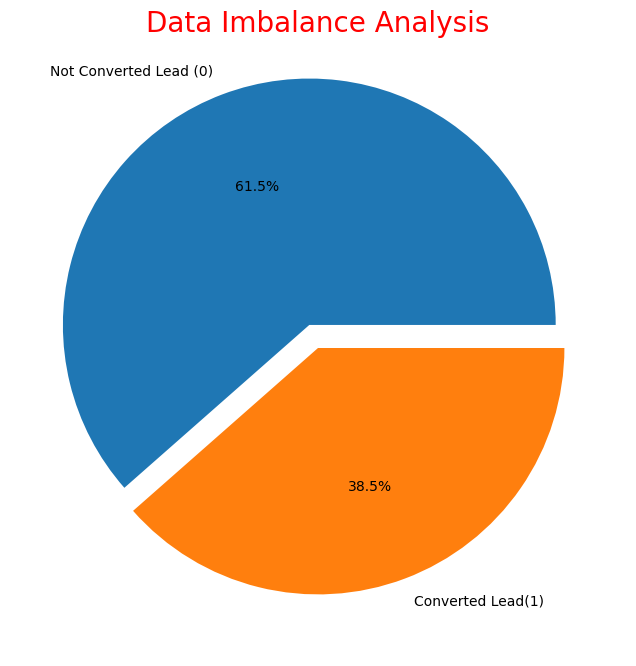

In [60]:
# Checking data distribution using Pie Chart
plt.figure(figsize=[8,8])
im_explode=[0.1,0]
plt.pie([Converted_0.shape[0],Converted_1.shape[0]], labels=["Not Converted Lead (0)","Converted Lead(1)"], explode=im_explode, autopct='%1.1f%%')
plt.title("Data Imbalance Analysis", fontdict={'fontsize':20,'fontweight':6,'color':'red'})
plt.show()

## Step 3: Data Preparation for Modelling

### Dummy variable creation

In [61]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(lead[['Lead Origin', 'Lead Source','Last Activity','Specialization','What is your current occupation','Tags','City','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy], axis=1)

In [62]:
#Lets drop the original values for categorical columns since we have dummy variables created for them now.
lead=lead.drop(['Lead Origin', 'Lead Source','Last Activity','Specialization','What is your current occupation','Tags','City','Last Notable Activity'],1)

In [63]:
# Lets check the dataset once.
lead.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0       

In [64]:
lead.corr()

Do Not Email  Converted  \
Do Not Email                                            1.000000  -0.132879   
Converted                                              -0.132879   1.000000   
TotalVisits                                            -0.018485   0.050210   
Total Time Spent on Website                            -0.045955   0.359630   
Page Views Per Visit                                    0.016326  -0.005636   
A free copy of Mastering The Interview                  0.054237  -0.040934   
Lead Origin_Landing Page Submission                     0.092188  -0.051533   
Lead Origin_Lead Add Form                              -0.019498   0.325676   
Lead Origin_Lead Import                                -0.017415  -0.023927   
Lead Origin_Quick Add Form                              0.036248   0.013299   
Lead Source_Direct Traffic                              0.104879  -0.079562   
Lead Source_Facebook                                   -0.017415  -0.023927   
Lead Source_Google                                     -0.059827   0.026921   
Lead Source_Live Chat                                  -0.004322   0.018809   
Lead Source_NC_EDM                                     -0.003056   0.013299   
Lead Source_Olark Chat                                 -0.049313  -0.130845   
Lead Source_Organic Search                              0.035700  -0.010330   
Lead Source_Pay per Click Ads                          -0.003056  -0.008329   
Lead Source_Press_Release                               0.036248  -0.008329   
Lead Source_Reference                                  -0.037626   0.274013   
Lead Source_Referral Sites                             -0.010364  -0.033813   
Lead Source_Social Media                               -0.004322   0.003515   
Lead Source_WeLearn                                    -0.003056   0.013299   
Lead Source_Welingak Website                           -0.000134   0.156072   
Lead Source_bing                                       -0.007487  -0.011575   
Lead Source_blog                                       -0.003056  -0.008329   
Lead Source_google                                      0.010746  -0.018628   
Lead Source_testone                                    -0.003056  -0.008329   
Lead Source_welearnblog_Home                           -0.003056  -0.008329   
Lead Source_youtubechannel                              0.036248  -0.008329   
Last Activity_Converted to Lead                        -0.062742  -0.118414   
Last Activity_Email Bounced                             0.629983  -0.120568   
Last Activity_Email Link Clicked                       -0.043026  -0.040075   
Last Activity_Email Marked Spam                         0.051265   0.018809   
Last Activity_Email Opened                             -0.221746  -0.016035   
Last Activity_Email Received                           -0.004322   0.018809   
Last Activity_Form Submitted on Website                -0.021526  -0.033813   
Last Activity_Had a Phone Conversation                 -0.009172   0.039550   
Last Activity_Olark Chat Conversation                  -0.053507  -0.213901   
Last Activity_Page Visited on Website                   0.061357  -0.081624   
Last Activity_Resubscribed to emails                   -0.003056   0.013299   
Last Activity_SMS Sent                                 -0.015231   0.329907   
Last Activity_Unreachable                               0.008709  -0.007541   
Last Activity_Unsubscribed                              0.266423  -0.022706   
Last Activity_View in browser link Clicked             -0.006113  -0.016660   
Last Activity_Visited Booth in Tradeshow               -0.003056  -0.008329   
Specialization_Business Administration                  0.007149   0.022386   
Specialization_E-Business                               0.009664  -0.002347   
Specialization_E-COMMERCE                               0.025535  -0.006741   
Specialization_Finance Management                      -0.038046  -0.123479   
Specialization_Healthca

## Step 4: Splitting the data into Train and Test sets

In [65]:
# Putting feature variable to X
X = lead.drop(['Converted'], axis = 1)
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0                 0                 0   
4                             0  

In [66]:
# Putting target variable to y
y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [67]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [68]:
# Checking Shape of Train & Test
print("Train data shape :-",X_train.shape)
print("Test data shape :-",X_test.shape)

Train data shape :- (6320, 112)
Test data shape :- (2709, 112)


#### Scaling the Features for continuous variables

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
# Scaling the three numeric features present in the dataset
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                                                              'Total Time Spent on Website',
                                                                                                              'Page Views Per Visit']])
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
5493             0       0.1250                     0.042254   
8064             0       0.1875                     0.041373   
4716             1       0.1875                     0.099032   
9117             0       0.0000                     0.000000   
2402             0       0.3750                     0.381162   

      Page Views Per Visit  A free copy of Mastering The Interview  \
5493                 0.250                                       1   
8064                 0.375                                       0   
4716                 0.375                                       1   
9117                 0.000                                       0   
2402                 0.250                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5493                                    1                          0   
8064                                    0                          0   
4716                                    1                          0   
9117                                    0                          0   
2402                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
5493                        0                           0   
8064                        0                           0   
4716                        0                           0   
9117                        0                           0   
2402                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
5493                           1                     0                   0   
8064                           1                     0                   0   
4716                           0                     0                   0   
9117                           0                     0                   0   
2402                           0                     0                   1   

      Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
5493                      0                   0                       0   
8064                      0                   0                       0   
4716                      0                   0                       0   
9117                      0                   0                       1   
2402                      0                   0                       0   

      Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
5493                           0                              0   
8064                           0                              0   
4716                           1                              0   
9117                           0                              0   
2402                           0                              0   

      Lead Source_Press_Release  Lead Source_Reference  \
5493                          0                      0   
8064                          0                      0   
4716                          0                      0   
9117                          0                      0   
2402                          0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
5493                           0                         0   
8064                           0                         0   
4716                           0                         0   
9117                           0                         0   
2402                           0                         0   

      Lead Source_WeLearn  Lead Source_Welingak Website  Lead Source_bing  \
5493                    0                             0                 0   
8064                    0                             0                 0   
4716                    0                             0                 0   
9117                    0                      

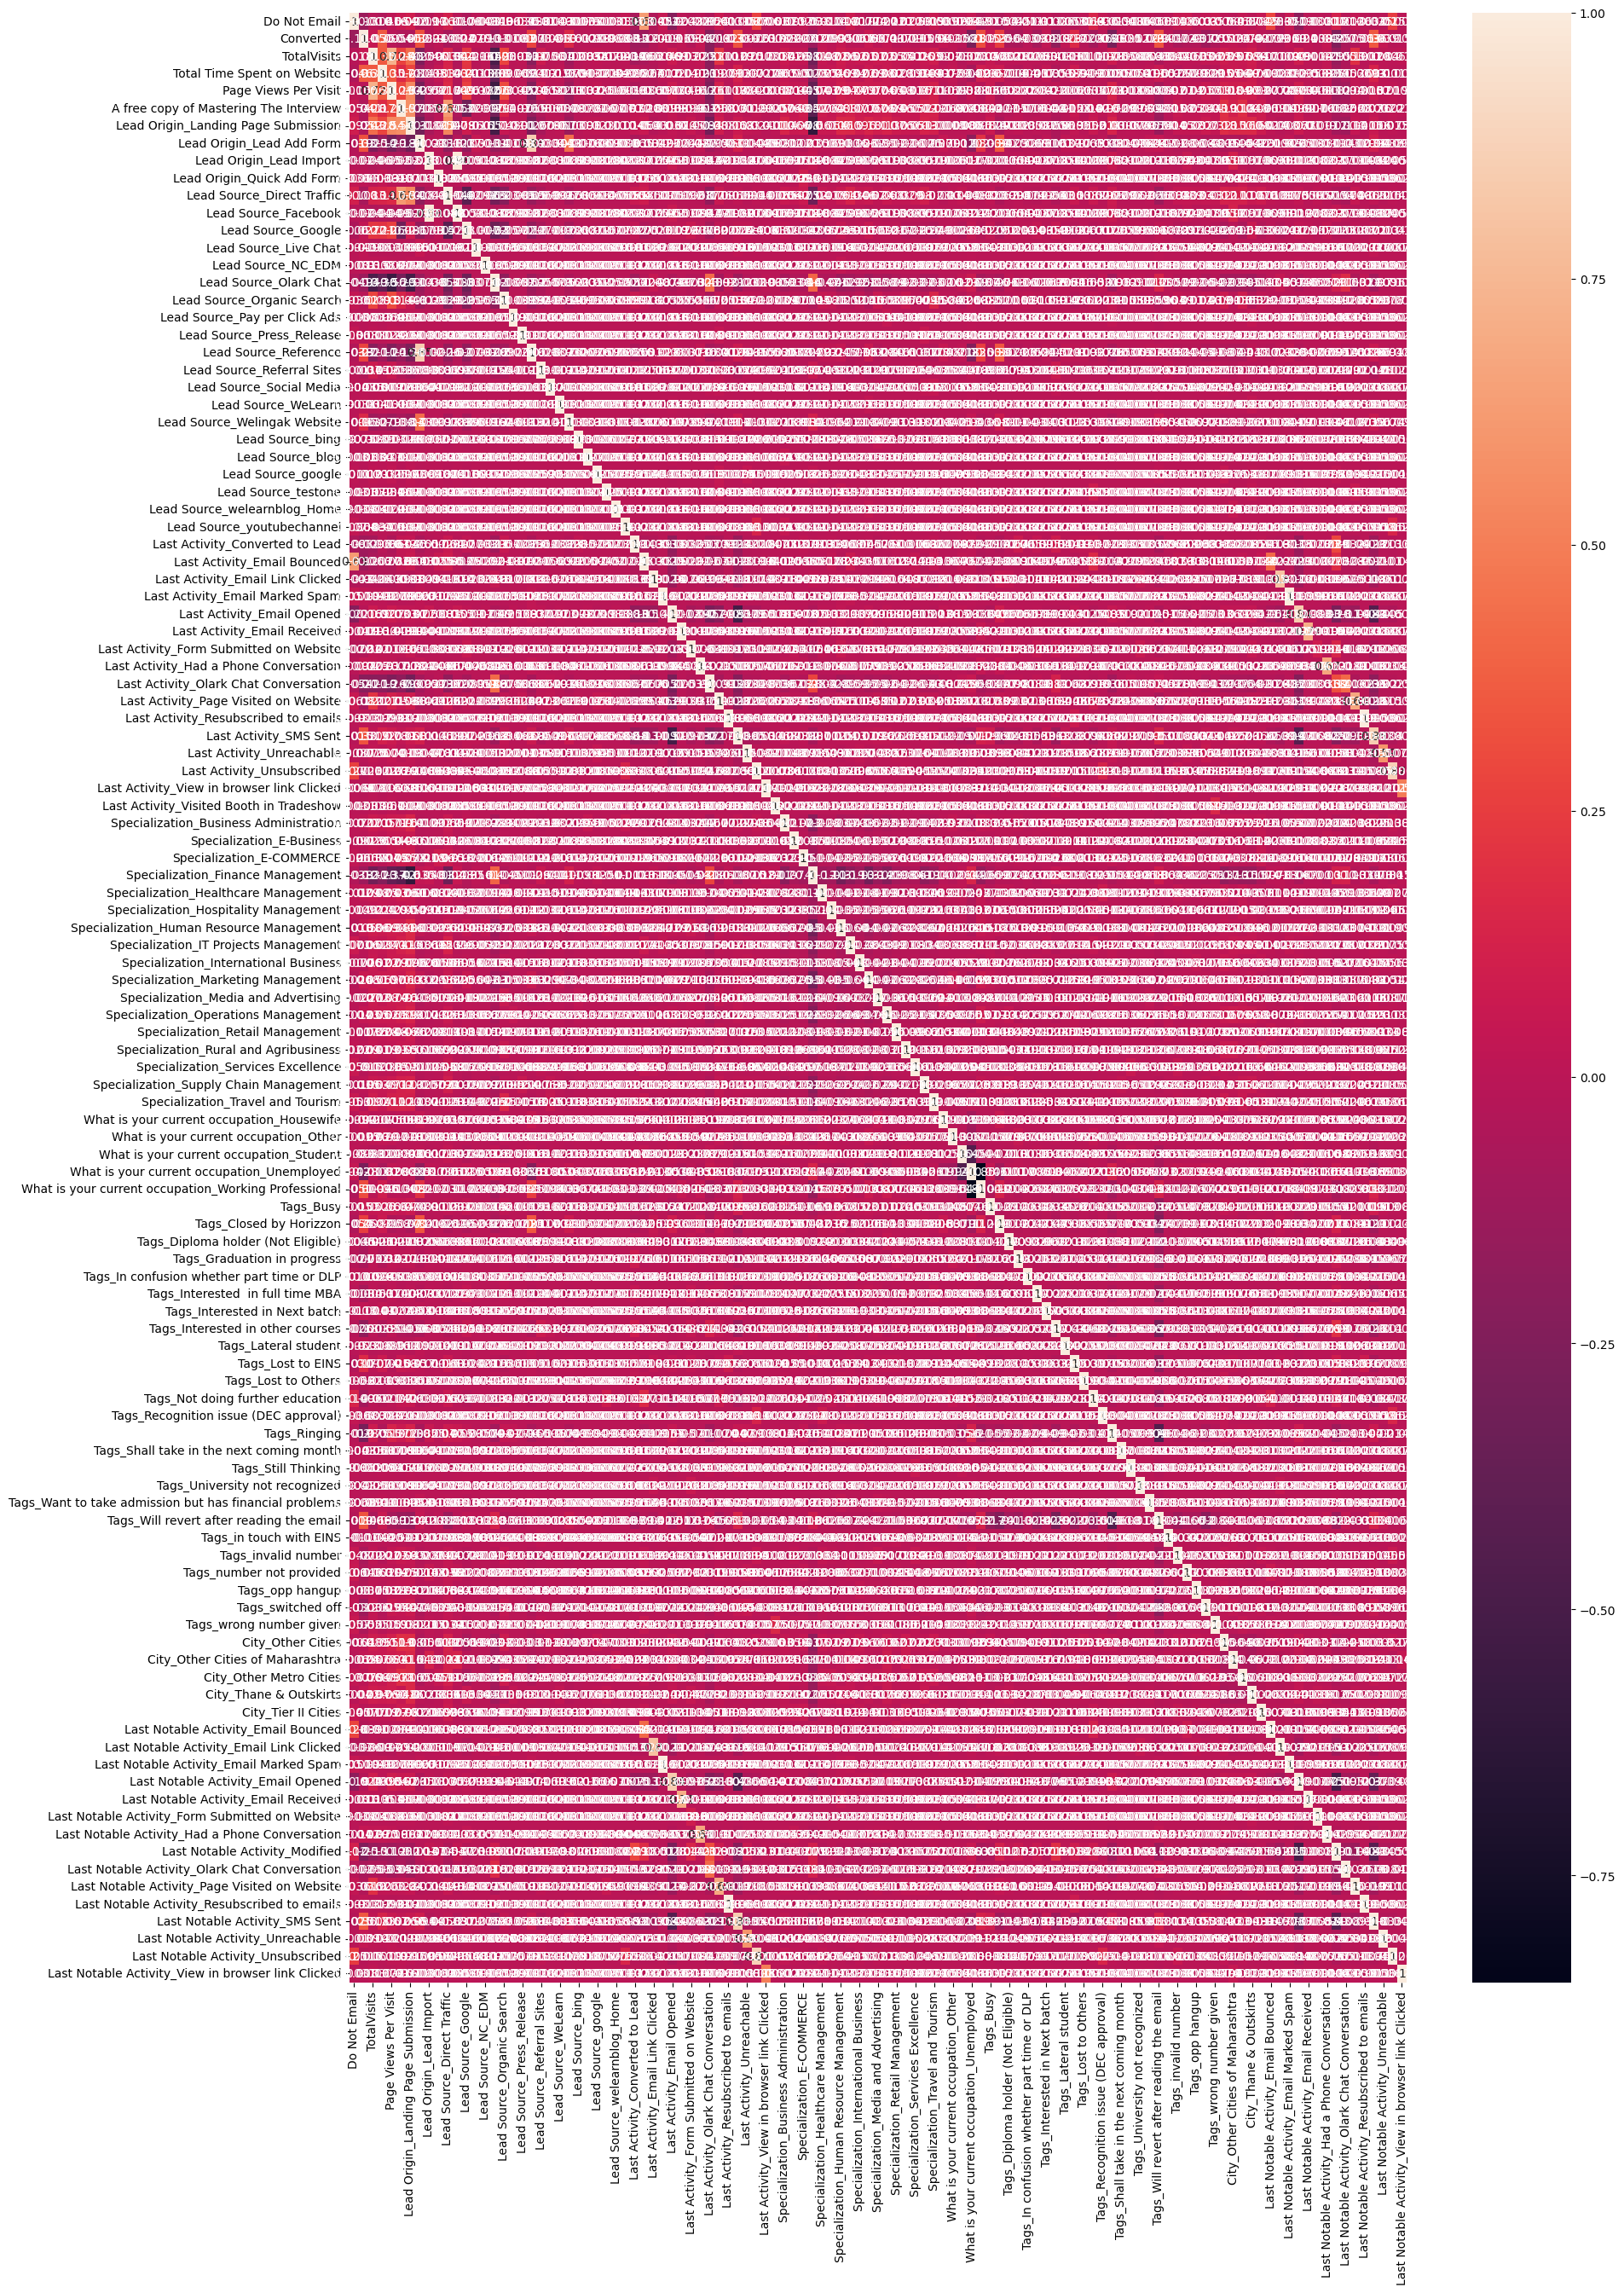

In [71]:
# Heatmap for correlation matrix
plt.figure(figsize=(20,30))
sns.heatmap(lead.corr(), annot=True)
plt.show()

## Step 5 : Building a Logistic Regression model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [72]:
import statsmodels.api as sm

# Add a constant
X_train = sm.add_constant(X_train)

# Create a first fitted model
lrm1=sm.GLM(y_train,X_train, family=sm.families.Binomial())
lrm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6215
Model Family:                Binomial   Df Model:                          104
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 15 Jan 2024   Deviance:                       98551.
Time:                        20:54:48   Pearson chi2:                 4.82e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   2.146e+15   5.39e+07   3.98e+07      0.000    2.15e+15    2.15e+15
Do Not Email                                           -3.504e+14   4.58e+06  -7.66e+07      0.000    -3.5e+14    -3.5e+14
TotalVisits                                             2.746e+14   7.59e+06   3.62e+07      0.000    2.75e+14    2.75e+14
Total Time Spent on Website                             1.849e+15   4.17e+06   4.43e+08      0.000    1.85e+15    1.85e+15
Page Views Per Visit                                   -9.025e+13   6.38e+06  -1.42e+07      0.000   -9.03e+13   -9.03e+13
A free copy of Mastering The Interview                 -4.316e+13   2.73e+06  -1.58e+07      0.000   -4.32e+13   -4.32e+13
Lead Origin_Landing Page Submission                    -1.677e+14   3.02e+06  -5.55e+07      0.000   -1.68e+14   -1.68e+14
Lead Origin_Lead Add Form                               1.146e+15   1.33e+07   8.63e+07      0.000    1.15e+15    1.15e+15
Lead Origin_Lead Import                                 1.401e+15   4.88e+07   2.87e+07      0.000     1.4e+15     1.4e+15
Lead Origin_Quick Add Form                                43.7801   3.68e-07   1.19e+08      0.000      43.780      43.780
Lead Source_Direct Traffic                             -1.018e+15   4.27e+07  -2.38e+07      0.000   -1.02e+15   -1.02e+15
Lead Source_Facebook                                   -2.708e+15   6.47e+07  -4.18e+07      0.000   -2.71e+15   -2.71e+15
Lead Source_Google                                     -1.119e+15   4.26e+07  -2.63e+07      0.000   -1.12e+15   -1.12e+15
Lead Source_Live Chat                                   1.018e+16   6.25e+07   1.63e+08      0.000    1.02e+16    1.02e+16
Lead Source_NC_EDM                                      3.754e+14   7.95e+07   4.72e+06      0.000    3.75e+14    3.75e+14
Lead Source_Olark Chat                                 -8.687e+14   4.28e+07  -2.03e+07      0.000   -8.69e+14   -8.69e+14
Lead Source_Organic Search                             -1.002e+15   4.27e+07  -2.35e+07      0.000      -1e+15      -1e+15
Lead Source_Pay per Click Ads                            -16.0386   2.23e-07  -7.19e+07      0.000     -16.039     -16.039
Lead Source_Press_Release                              -4.147e+15   8.01e+07  -5.18e+07      0.000   -4.15e+15   -4.15e+15
Lead Source_Reference                                   -9.26e+14   4.07e+07  -2.27e+07      0.000   -9.26e+14   -9.26e+14
Lead Source_Referral Sites                             -1.306e+15   4.34e+07  -3.01e+07      0.000   -1.31e+15   -1.31e+15
Lead Source_Social Media                                5.894e+14    6.4e+07    9.2e+06      0.000    5.89e+14    5.89e+14
Lead Sou

### Model Building using RFE

In [73]:
# Import RFE and reducing the features to 15
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [74]:
# Top 15 Features Selected by RFE for Modelling are:
rfe.support_

array([False,  True, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False,  True, False])

In [75]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('const', False, 89),
 ('Do Not Email', True, 1),
 ('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 29),
 ('A free copy of Mastering The Interview', False, 63),
 ('Lead Origin_Landing Page Submission', False, 15),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 20),
 ('Lead Origin_Quick Add Form', False, 96),
 ('Lead Source_Direct Traffic', False, 56),
 ('Lead Source_Facebook', False, 59),
 ('Lead Source_Google', False, 58),
 ('Lead Source_Live Chat', False, 75),
 ('Lead Source_NC_EDM', False, 53),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 57),
 ('Lead Source_Pay per Click Ads', False, 97),
 ('Lead Source_Press_Release', False, 93),
 ('Lead Source_Reference', False, 92),
 ('Lead Source_Referral Sites', False, 91),
 ('Lead Source_Social Media', False, 28),
 ('Lead Source_WeLearn', False, 65),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 67),

### Model building and Evaluation

In [76]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe.support_]
col1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [77]:
# list of rfe not supported columns
X_train.columns[~rfe.support_]

Index(['const', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Act

In [78]:
# Dataset of columns selected by RFE are:
X_train[col1].head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
5493             0                     0.042254                          0   
8064             0                     0.041373                          0   
4716             1                     0.099032                          0   
9117             0                     0.000000                          0   
2402             0                     0.381162                          0   

      Lead Source_Welingak Website  Last Activity_Olark Chat Conversation  \
5493                             0                                      0   
8064                             0                                      0   
4716                             0                                      0   
9117                             0                                      0   
2402                             0                                      0   

      What is your current occupation_Unemployed  \
5493                                           1   
8064                                           1   
4716                                           1   
9117                                           1   
2402                                           1   

      What is your current occupation_Working Professional  Tags_Busy  \
5493                                                  0             0   
8064                                                  0             0   
4716                                                  0             0   
9117                                                  0             0   
2402                                                  0             0   

      Tags_Closed by Horizzon  Tags_Lost to EINS  \
5493                        0                  0   
8064                        0                  0   
4716                        0                  0   
9117                        0                  0   
2402                        0                  0   

      Tags_Will revert after reading the email  Tags_invalid number  \
5493                                         0                    0   
8064                                         0                    0   
4716                                         1                    0   
9117                                         0                    0   
2402                                         1                    0   

      Last Notable Activity_Had a Phone Conversation  \
5493                                               0   
8064                                               0   
4716                                               0   
9117                                               0   
2402                                               0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unsubscribed  
5493                               0                                   0  
8064                               0                                   0  
4716                               0                                   0  
9117                               0                                   0  
2402                               0                                   0

In [79]:
# BUILDING the first model
# Fit a Logistic Regression Model on X-train after adding a constant and output the summary 

# Adding constant
X_train_sm = sm.add_constant(X_train[col1])

# Running the model
lg1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Fit a line
res1 = lg1.fit()

In [80]:
# Checking the model summary
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1754.2
Date:                Mon, 15 Jan 2024   Deviance:                       3508.4
Time:                        20:55:33   Pearson chi2:                 8.78e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5390
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.2750      0.359    -11.902      0.000      -4.979      -3.571
Do Not Email                                            -1.6019      0.201     -7.964      0.000      -1.996      -1.208
Total Time Spent on Website                              3.9901      0.189     21.117      0.000       3.620       4.360
Lead Origin_Lead Add Form                                2.9973      0.259     11.595      0.000       2.491       3.504
Lead Source_Welingak Website                             1.6666      0.772      2.159      0.031       0.154       3.179
Last Activity_Olark Chat Conversation                   -1.2238      0.178     -6.878      0.000      -1.573      -0.875
What is your current occupation_Unemployed              -1.5649      0.329     -4.750      0.000      -2.211      -0.919
What is your current occupation_Working Professional     1.1352      0.409      2.773      0.006       0.333       1.938
Tags_Busy                                                3.7732      0.273     13.803      0.000       3.237       4.309
Tags_Closed by Horizzon                                  9.4479      1.029      9.181      0.000       7.431      11.465
Tags_Lost to EINS                                        8.6811      0.631     13.767      0.000       7.445       9.917
Tags_Will revert after reading the email                 4.3199      0.173     24.991      0.000       3.981       4.659
Tags_invalid number                                    -21.2549   1.42e+04     -0.001      0.999   -2.78e+04    2.78e+04
Last Notable Activity_Had a Phone Conversation           2.8474      1.086      2.623      0.009       0.719       4.975
Last Notable Activity_SMS Sent                           2.4275      0.112     21.659      0.000       2.208       2.647
Last Notable Activity_Unsubscribed                       2.1515      0.633      3.400      0.001       0.911       3.392
========================================================================================================================
"""

There are variables which have high p-value (>0.5),Variance Inflation Factor or VIF gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an imperative parameter to test our model.

In [81]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
# Checking the VIF for the new model-
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5          What is your current occupation_Unemployed  3.68
10           Tags_Will revert after reading the email  2.99
1                         Total Time Spent on Website  2.00
2                           Lead Origin_Lead Add Form  1.66
6   What is your current occupation_Working Profes...  1.51
13                     Last Notable Activity_SMS Sent  1.49
8                             Tags_Closed by Horizzon  1.34
3                        Lead Source_Welingak Website  1.30
4               Last Activity_Olark Chat Conversation  1.22
0                                        Do Not Email  1.16
7                                           Tags_Busy  1.09
9                                   Tags_Lost to EINS  1.08
14                 Last Notable Activity_Unsubscribed  1.07
11                                Tags_invalid number  1.04
12     Last Notable Activity_Had a Phone Conversation  1.00

In [83]:
# dropping one column with high p-value
col1 = col1.drop('Tags_invalid number',1)

In [84]:
# BUILDING 2nd model
X_train_sm = sm.add_constant(X_train[col1])
lg2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = lg2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1756.4
Date:                Mon, 15 Jan 2024   Deviance:                       3512.9
Time:                        20:56:42   Pearson chi2:                 8.93e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5387
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.3027      0.361    -11.928      0.000      -5.010      -3.596
Do Not Email                                            -1.6015      0.201     -7.964      0.000      -1.996      -1.207
Total Time Spent on Website                              3.9797      0.188     21.116      0.000       3.610       4.349
Lead Origin_Lead Add Form                                3.0066      0.259     11.588      0.000       2.498       3.515
Lead Source_Welingak Website                             1.6552      0.772      2.144      0.032       0.142       3.169
Last Activity_Olark Chat Conversation                   -1.2250      0.178     -6.885      0.000      -1.574      -0.876
What is your current occupation_Unemployed              -1.5747      0.331     -4.760      0.000      -2.223      -0.926
What is your current occupation_Working Professional     1.1333      0.411      2.757      0.006       0.328       1.939
Tags_Busy                                                3.8169      0.273     13.970      0.000       3.281       4.352
Tags_Closed by Horizzon                                  9.4865      1.029      9.218      0.000       7.470      11.504
Tags_Lost to EINS                                        8.7201      0.631     13.828      0.000       7.484       9.956
Tags_Will revert after reading the email                 4.3604      0.173     25.204      0.000       4.021       4.700
Last Notable Activity_Had a Phone Conversation           2.8459      1.086      2.622      0.009       0.718       4.974
Last Notable Activity_SMS Sent                           2.4209      0.112     21.623      0.000       2.201       2.640
Last Notable Activity_Unsubscribed                       2.1424      0.631      3.395      0.001       0.906       3.379
========================================================================================================================
"""

In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5          What is your current occupation_Unemployed  3.61
10           Tags_Will revert after reading the email  2.94
1                         Total Time Spent on Website  2.00
2                           Lead Origin_Lead Add Form  1.66
6   What is your current occupation_Working Profes...  1.50
12                     Last Notable Activity_SMS Sent  1.48
8                             Tags_Closed by Horizzon  1.34
3                        Lead Source_Welingak Website  1.30
4               Last Activity_Olark Chat Conversation  1.22
0                                        Do Not Email  1.16
7                                           Tags_Busy  1.08
9                                   Tags_Lost to EINS  1.08
13                 Last Notable Activity_Unsubscribed  1.06
11     Last Notable Activity_Had a Phone Conversation  1.00

In [86]:
# dropping column with high p-value
col1 = col1.drop('Lead Source_Welingak Website',1)

In [87]:
# BUILDING 3rd model
X_train_sm = sm.add_constant(X_train[col1])
lg3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3 = lg3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1759.7
Date:                Mon, 15 Jan 2024   Deviance:                       3519.5
Time:                        21:01:05   Pearson chi2:                 9.26e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5382
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.3417      0.364    -11.937      0.000      -5.055      -3.629
Do Not Email                                            -1.5996      0.200     -7.988      0.000      -1.992      -1.207
Total Time Spent on Website                              3.9803      0.189     21.092      0.000       3.610       4.350
Lead Origin_Lead Add Form                                3.3197      0.236     14.037      0.000       2.856       3.783
Last Activity_Olark Chat Conversation                   -1.2275      0.178     -6.902      0.000      -1.576      -0.879
What is your current occupation_Unemployed              -1.5657      0.334     -4.692      0.000      -2.220      -0.912
What is your current occupation_Working Professional     1.1235      0.414      2.716      0.007       0.313       1.934
Tags_Busy                                                3.8481      0.274     14.052      0.000       3.311       4.385
Tags_Closed by Horizzon                                  9.5113      1.029      9.239      0.000       7.494      11.529
Tags_Lost to EINS                                        8.7514      0.631     13.872      0.000       7.515       9.988
Tags_Will revert after reading the email                 4.3943      0.174     25.258      0.000       4.053       4.735
Last Notable Activity_Had a Phone Conversation           2.8420      1.086      2.618      0.009       0.714       4.970
Last Notable Activity_SMS Sent                           2.4182      0.112     21.597      0.000       2.199       2.638
Last Notable Activity_Unsubscribed                       2.1187      0.636      3.332      0.001       0.872       3.365
========================================================================================================================
"""

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4          What is your current occupation_Unemployed  3.61
9            Tags_Will revert after reading the email  2.93
1                         Total Time Spent on Website  2.00
5   What is your current occupation_Working Profes...  1.48
11                     Last Notable Activity_SMS Sent  1.48
2                           Lead Origin_Lead Add Form  1.35
7                             Tags_Closed by Horizzon  1.34
3               Last Activity_Olark Chat Conversation  1.22
0                                        Do Not Email  1.16
6                                           Tags_Busy  1.08
8                                   Tags_Lost to EINS  1.08
12                 Last Notable Activity_Unsubscribed  1.06
10     Last Notable Activity_Had a Phone Conversation  1.00

In [89]:
# dropping column with high p-value
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation',1)

In [90]:
# Building 4th model
X_train_sm = sm.add_constant(X_train[col1])
lg4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res4 = lg4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1765.5
Date:                Mon, 15 Jan 2024   Deviance:                       3531.0
Time:                        21:03:47   Pearson chi2:                 9.23e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5374
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.3406      0.364    -11.933      0.000      -5.054      -3.628
Do Not Email                                            -1.6072      0.200     -8.036      0.000      -1.999      -1.215
Total Time Spent on Website                              3.9768      0.188     21.107      0.000       3.608       4.346
Lead Origin_Lead Add Form                                3.3112      0.237     13.996      0.000       2.848       3.775
Last Activity_Olark Chat Conversation                   -1.2405      0.178     -6.980      0.000      -1.589      -0.892
What is your current occupation_Unemployed              -1.5565      0.334     -4.664      0.000      -2.211      -0.902
What is your current occupation_Working Professional     1.1233      0.414      2.714      0.007       0.312       1.934
Tags_Busy                                                3.8445      0.274     14.051      0.000       3.308       4.381
Tags_Closed by Horizzon                                  9.5049      1.030      9.232      0.000       7.487      11.523
Tags_Lost to EINS                                        8.7458      0.631     13.860      0.000       7.509       9.983
Tags_Will revert after reading the email                 4.3983      0.174     25.304      0.000       4.058       4.739
Last Notable Activity_SMS Sent                           2.4072      0.112     21.517      0.000       2.188       2.626
Last Notable Activity_Unsubscribed                       2.1142      0.636      3.326      0.001       0.868       3.360
========================================================================================================================
"""

In [91]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4          What is your current occupation_Unemployed  3.61
9            Tags_Will revert after reading the email  2.93
1                         Total Time Spent on Website  2.00
5   What is your current occupation_Working Profes...  1.48
10                     Last Notable Activity_SMS Sent  1.48
2                           Lead Origin_Lead Add Form  1.35
7                             Tags_Closed by Horizzon  1.34
3               Last Activity_Olark Chat Conversation  1.22
0                                        Do Not Email  1.16
6                                           Tags_Busy  1.08
8                                   Tags_Lost to EINS  1.08
11                 Last Notable Activity_Unsubscribed  1.06

In [117]:
# dropping column with high p-value
col1 = col1.drop('What is your current occupation_Working Professional',1)

In [118]:
# Building 5th model
X_train_sm = sm.add_constant(X_train[col1])
lg5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res5 = lg5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6308
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1769.2
Date:                Mon, 15 Jan 2024   Deviance:                       3538.4
Time:                        21:45:56   Pearson chi2:                 9.17e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5368
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -3.6293      0.245    -14.802      0.000      -4.110      -3.149
Do Not Email                                  -1.6412      0.200     -8.190      0.000      -2.034      -1.248
Total Time Spent on Website                    3.9758      0.188     21.120      0.000       3.607       4.345
Lead Origin_Lead Add Form                      3.3333      0.238     14.000      0.000       2.867       3.800
Last Activity_Olark Chat Conversation         -1.2418      0.177     -6.999      0.000      -1.590      -0.894
What is your current occupation_Unemployed    -2.3019      0.197    -11.661      0.000      -2.689      -1.915
Tags_Busy                                      3.8732      0.274     14.135      0.000       3.336       4.410
Tags_Closed by Horizzon                        9.5473      1.029      9.276      0.000       7.530      11.565
Tags_Lost to EINS                              8.7806      0.631     13.912      0.000       7.544      10.018
Tags_Will revert after reading the email       4.4334      0.173     25.568      0.000       4.094       4.773
Last Notable Activity_SMS Sent                 2.4192      0.112     21.631      0.000       2.200       2.638
Last Notable Activity_Unsubscribed             2.1705      0.632      3.434      0.001       0.932       3.410
==============================================================================================================
"""

Since the Model 5 seems to be stable with significant p-values, we shall go ahead with this model for further analysis.The VIFs and p-values both are within an acceptable range. So we will move further and make our predictions using this model only.

In [124]:
# dropping column with high p-value
col1 = col1.drop('Last Notable Activity_Unsubscribed',1)

In [125]:
# Building 5th model
X_train_sm = sm.add_constant(X_train[col1])
lg6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res6 = lg6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1774.8
Date:                Mon, 15 Jan 2024   Deviance:                       3549.6
Time:                        21:48:35   Pearson chi2:                 9.03e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5360
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -3.6186      0.245    -14.792      0.000      -4.098      -3.139
Do Not Email                                  -1.4611      0.188     -7.769      0.000      -1.830      -1.092
Total Time Spent on Website                    3.9735      0.188     21.144      0.000       3.605       4.342
Lead Origin_Lead Add Form                      3.3384      0.238     14.048      0.000       2.873       3.804
Last Activity_Olark Chat Conversation         -1.2469      0.177     -7.032      0.000      -1.594      -0.899
What is your current occupation_Unemployed    -2.3036      0.197    -11.694      0.000      -2.690      -1.918
Tags_Busy                                      3.8712      0.274     14.133      0.000       3.334       4.408
Tags_Closed by Horizzon                        9.5370      1.029      9.266      0.000       7.520      11.554
Tags_Lost to EINS                              8.7614      0.630     13.901      0.000       7.526       9.997
Tags_Will revert after reading the email       4.4285      0.173     25.558      0.000       4.089       4.768
Last Notable Activity_SMS Sent                 2.4008      0.111     21.555      0.000       2.182       2.619
==============================================================================================================
"""

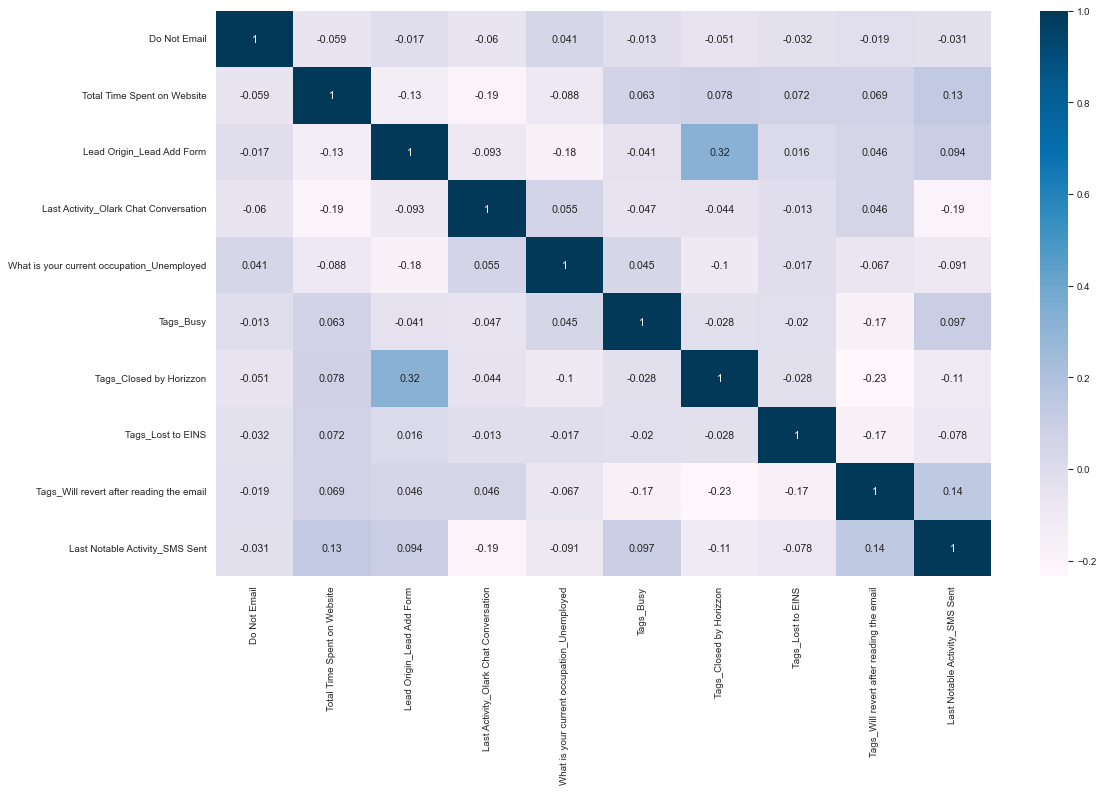

In [138]:
# Checking Correlations Again:
plt.figure(figsize=(15,10), dpi=80, facecolor='w', edgecolor='k', frameon='True')

corr = X_train[col1].corr()
sns.heatmap(corr, annot=True, cmap="PuBu")

plt.tight_layout()
plt.show()

## Step 6: Making predictions using the final model

In [126]:
# Predicting the probabilities (of the "converted" value being 1) on the train set
y_train_pred = res6.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.00315908, 0.00314808, 0.07167061, 0.00267212, 0.50521561,
       0.06061919, 0.06061919, 0.22411448, 0.28888386, 0.75146837])

In [127]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect Id'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect Id
0          0        0.003159         5493
1          0        0.003148         8064
2          0        0.071671         4716
3          0        0.002672         9117
4          1        0.505216         2402

Now we will devise a dataframe having a new column 'predicted' with 1 if Converted_Prob > 0.5 else 0. Since the logistic curve gives you just the probabilities and not the actual classification of 'Converted' and 'Not Converted', you need to find a threshold probability to classify customers as 'Converted' and 'Not Converted'. Here, we choose 0.5 as an arbitrary cutoff wherein if the probability of a particular customer churning is less than 0.5, you'd classify it as 'Not Converted' and if it's greater than 0.5, you'd classify it as 'Converted'. The choice of 0.5 is completely arbitrary.

In [128]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect Id  predicted
0          0        0.003159         5493          0
1          0        0.003148         8064          0
2          0        0.071671         4716          0
3          0        0.002672         9117          0
4          1        0.505216         2402          1

## Step 7 : Model Evaluation

In [139]:
from sklearn import metrics

In [140]:
# Lets check the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3628  281]
 [ 390 2021]]


In [141]:
# checking the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8938291139240506


In [143]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [144]:
# Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8382413936126089

In [145]:
# Let us calculate specificity
TN / float(TN+FP)

0.9281146073164492

In [146]:
# Calculate false postive rate - predicting non conversion when leads have converted
print(FP/ float(TN+FP))

0.07188539268355078


In [147]:
# positive predictive value 
print (TP / float(TP+FP))

0.8779322328410079


In [148]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9029367844698856


Our model seems to have high accuracy (89.41%), low sensitivity (83,94%) and high specificity (92.78%). We will identify the customers which might convert, with the help of ROC Curves in the next section.

## Step 8: Plotting the ROC curve

In [149]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [150]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

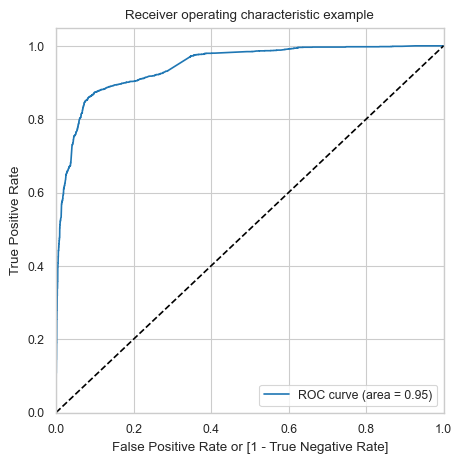

In [151]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The area under the curve of the ROC is nearly equal to 1 which is quite good. so we seem to have a good model. Lets also check the sensitivity and specificity tradeoff to find the optimal cut off point.

## Step 9 : Finding Optimal Cutoff point

In [152]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect Id  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.003159         5493          0    1    0    0    0    0   
1          0        0.003148         8064          0    1    0    0    0    0   
2          0        0.071671         4716          0    1    0    0    0    0   
3          0        0.002672         9117          0    1    0    0    0    0   
4          1        0.505216         2402          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    1    0    0    0    0

In [158]:
#  Let's calculate accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_prob = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_prob.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_prob)

     prob  accuracy     sensi     speci
0.0   0.0  0.381487  1.000000  0.000000
0.1   0.1  0.763133  0.976773  0.631364
0.2   0.2  0.810127  0.921609  0.741366
0.3   0.3  0.875633  0.886354  0.869020
0.4   0.4  0.893196  0.861883  0.912510
0.5   0.5  0.893829  0.838241  0.928115
0.6   0.6  0.884810  0.794276  0.940650
0.7   0.7  0.871677  0.733306  0.957022
0.8   0.8  0.838291  0.607632  0.980558
0.9   0.9  0.804272  0.502281  0.990535


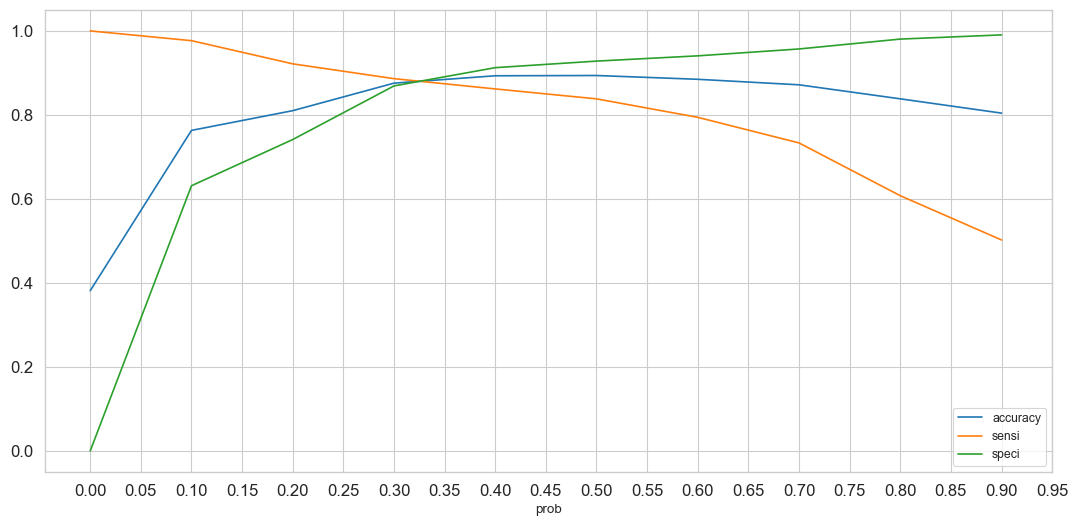

In [159]:
#Plotting Graph
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid") 
sns.set_context("paper") 
cutoff_prob.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(13,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

In [160]:
# Evaluating the model with optimal probability cutoff as 0.33
y_train_pred_final['final_Predicted']=y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.33 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect Id  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.003159         5493          0    1    0    0    0    0   
1          0        0.003148         8064          0    1    0    0    0    0   
2          0        0.071671         4716          0    1    0    0    0    0   
3          0        0.002672         9117          0    1    0    0    0    0   
4          1        0.505216         2402          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_Predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    1    0    0    0    0                1

In [162]:
# Let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_Prob','Prospect Id','final_Predicted','lead_score']].head(10)

Converted  Converted_Prob  Prospect Id  final_Predicted  lead_score
0          0        0.003159         5493                0           0
1          0        0.003148         8064                0           0
2          0        0.071671         4716                0           7
3          0        0.002672         9117                0           0
4          1        0.505216         2402                1          51
5          0        0.060619         1796                0           6
6          0        0.060619         1120                0           6
7          0        0.224114          253                0          22
8          0        0.288884         1491                0          29
9          1        0.751468         2004                1          75

In [163]:
#Lets check accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))

0.8854430379746835


In [164]:
#Lets check confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3480,  429],
       [ 295, 2116]], dtype=int64)

In [165]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [166]:
# Sensitivity 
TP / float(TP+FN)

0.8776441310659477

In [167]:
# specificity
TN / float(TN+FP)

0.8902532617037605

In [168]:
# false postive rate
print(FP/ float(TN+FP))

0.10974673829623945


In [169]:
# Positive predictive value 
print (TP / float(TP+FP))

0.831434184675835


In [170]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9218543046357616


Accuracy : 88.54%,  Sensitivity : 87.76% and         Specificity : 89.02%

In [171]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
confusion

array([[3480,  429],
       [ 295, 2116]], dtype=int64)

In [172]:
# Precision:
preci= TP/ (TP + FP)
preci

0.831434184675835

In [173]:
# Recall:
reca=TP/ (TP + FN)
reca

0.8776441310659477

In [174]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final["Converted"],y_train_pred_final["final_Predicted"]))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      3909
           1       0.83      0.88      0.85      2411

    accuracy                           0.89      6320
   macro avg       0.88      0.88      0.88      6320
weighted avg       0.89      0.89      0.89      6320



In [175]:
F1 = 2*(preci*reca)/(preci+reca)
F1

0.853914447134786

In [177]:
# importing precision,recall curve
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

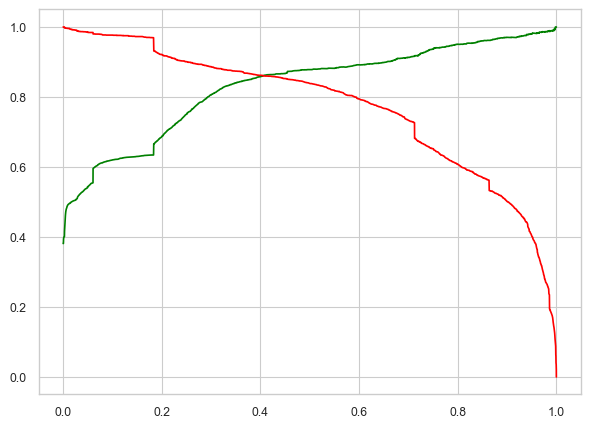

In [178]:
#Plotting threshold
plt.figure(figsize=[7,5])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Predictions on test set

In [179]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [181]:
X_test = X_test[col1]
X_test.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4664             0                     0.000000                          0   
5394             0                     0.072183                          0   
1595             0                     0.515405                          0   
2111             0                     0.229754                          0   
9182             0                     0.000000                          0   

      Last Activity_Olark Chat Conversation  \
4664                                      0   
5394                                      0   
1595                                      0   
2111                                      0   
9182                                      0   

      What is your current occupation_Unemployed  Tags_Busy  \
4664                                           1          0   
5394                                           1          0   
1595                                           0          0   
2111                                           1          0   
9182                                           1          0   

      Tags_Closed by Horizzon  Tags_Lost to EINS  \
4664                        0                  0   
5394                        0                  0   
1595                        1                  0   
2111                        0                  0   
9182                        0                  0   

      Tags_Will revert after reading the email  Last Notable Activity_SMS Sent  
4664                                         1                               0  
5394                                         1                               0  
1595                                         0                               0  
2111                                         1                               0  
9182                                         0                               0

In [182]:
print(y_test.shape)
print(X_test.shape)

(2709,)
(2709, 10)


In [183]:
#Add constant to X_test
X_test_sm = sm.add_constant(X_test)

In [184]:
# Making predictions on the test set
y_test_pred = res6.predict(X_test_sm)
y_test_pred[:10]

4664    0.183368
5394    0.230255
1595    0.999653
2111    0.358758
9182    0.002672
1055    0.620005
541     0.309038
446     0.984454
3728    0.193530
4249    0.051437
dtype: float64

In [185]:
# Converting y_pred to the dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4664  0.183368
5394  0.230255
1595  0.999653
2111  0.358758
9182  0.002672

In [186]:
# Converting y_test to dataframe
y_test_dataframe = pd.DataFrame(y_test)

In [187]:
#Making 'Prospect id ' as index
y_test_dataframe['Prospect Id'] = y_test_dataframe.index

In [188]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_dataframe.reset_index(drop=True, inplace=True)

In [190]:
# Appending y_test_dataframe and y_test_pred
y_pred_fin = pd.concat([y_test_dataframe, y_test_pred],axis=1)

In [191]:
# Checking the head() of the final dataframe
y_pred_fin.head()

Converted  Prospect Id         0
0          0         4664  0.183368
1          0         5394  0.230255
2          1         1595  0.999653
3          0         2111  0.358758
4          0         9182  0.002672

In [192]:
# Renaming the columns
y_pred_fin= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [193]:
y_pred_fin['Lead_Score'] = y_pred_fin.Converted_Prob.map(lambda x: round(x*100))
y_pred_fin.head()

Converted  Prospect Id  Converted_Prob  Lead_Score
0          0         4664        0.183368          18
1          0         5394        0.230255          23
2          1         1595        0.999653         100
3          0         2111        0.358758          36
4          0         9182        0.002672           0

In [194]:
# Reindexing the columns
y_pred_fin = y_pred_fin.reindex(['Prospect Id','Converted','Converted_Prob', 'Lead_Score'], axis=1)

In [195]:
# Let's see the head of y_pred_final
y_pred_fin.head()

Prospect Id  Converted  Converted_Prob  Lead_Score
0         4664          0        0.183368          18
1         5394          0        0.230255          23
2         1595          1        0.999653         100
3         2111          0        0.358758          36
4         9182          0        0.002672           0

In [196]:
y_pred_fin['final_predicted'] = y_pred_fin.Converted_Prob.map(lambda x: 1 if x > 0.33 else 0)
y_pred_fin.head()

Prospect Id  Converted  Converted_Prob  Lead_Score  final_predicted
0         4664          0        0.183368          18                0
1         5394          0        0.230255          23                0
2         1595          1        0.999653         100                1
3         2111          0        0.358758          36                1
4         9182          0        0.002672           0                0

In [197]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_fin.Converted, y_pred_fin.final_predicted)

0.8940568475452196

In [198]:
confusion2 = metrics.confusion_matrix(y_pred_fin.Converted, y_pred_fin.final_predicted)
confusion2

array([[1485,  158],
       [ 129,  937]], dtype=int64)

In [199]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [200]:
# Let's see the sensitivity 
TP / float(TP+FN)

0.8789868667917449

In [201]:
# Let us calculate specificity
TN / float(TN+FP)

0.9038344491783323

Accuracy : 89.4%, Sensitivity : 87.89% and Specificity : 90.03%

In [203]:
#Lets calc precision score
metrics.precision_score(y_pred_fin.Converted , y_pred_fin.final_predicted)

0.8557077625570776

In [204]:
#Lets calc recall score
metrics.recall_score(y_pred_fin.Converted, y_pred_fin.final_predicted)

0.8789868667917449

In [205]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.09616555082166768


In [206]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8557077625570776


In [207]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9200743494423792


In [208]:
print(classification_report(y_pred_fin["Converted"],y_pred_fin["final_predicted"]))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1643
           1       0.86      0.88      0.87      1066

    accuracy                           0.89      2709
   macro avg       0.89      0.89      0.89      2709
weighted avg       0.89      0.89      0.89      2709



In [210]:
# Precision and Recall metrics for the test set
print('Precision -',metrics.precision_score(y_pred_fin.Converted, y_pred_fin.final_predicted))

print('Recall -',metrics.recall_score(y_pred_fin.Converted, y_pred_fin.final_predicted))

Precision - 0.8557077625570776
Recall - 0.8789868667917449


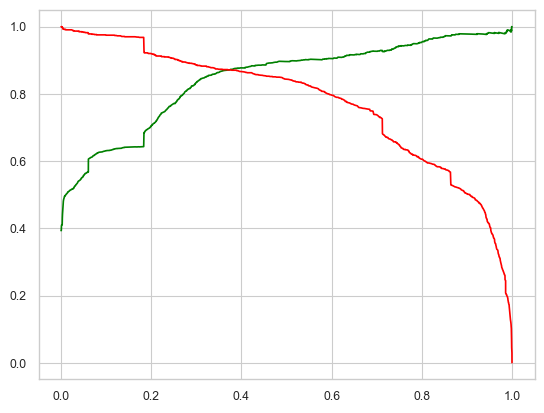

In [211]:
#Lets calculate the thresholds
p, r, thresholds = precision_recall_curve(y_pred_fin.Converted, y_pred_fin.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

To avoid overfitting, let us calculate the Cross Validation Score and see how our model performs.

In [212]:
from sklearn.model_selection import cross_val_score

X=X_train[:200]
y=y_train[:200]

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.7  0.7  0.75 0.8  0.8  0.85 0.9  0.9  0.95 0.95]
0.8300000000000001


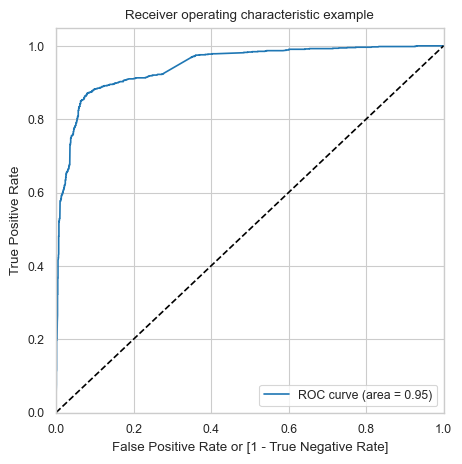

In [213]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_fin["Converted"], y_pred_fin["Converted_Prob"], drop_intermediate = False )
draw_roc(y_pred_fin["Converted"], y_pred_fin["Converted_Prob"])

#### Calculating lead score

In [214]:
#This needs to be calculated for all the leads from the original dataset (train + test)
leads_test_pred = y_pred_fin.copy()
leads_test_pred.head()

Prospect Id  Converted  Converted_Prob  Lead_Score  final_predicted
0         4664          0        0.183368          18                0
1         5394          0        0.230255          23                0
2         1595          1        0.999653         100                1
3         2111          0        0.358758          36                1
4         9182          0        0.002672           0                0

In [216]:
# Selecting the train dataset along with the Conversion probability and final predicted value for Converted
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

Converted  Converted_Prob  Prospect Id  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.003159         5493          0    1    0    0    0    0   
1          0        0.003148         8064          0    1    0    0    0    0   
2          0        0.071671         4716          0    1    0    0    0    0   
3          0        0.002672         9117          0    1    0    0    0    0   
4          1        0.505216         2402          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_Predicted  lead_score_board  lead_score  
0    0    0    0    0    0                0                 0           0  
1    0    0    0    0    0                0                 0           0  
2    0    0    0    0    0                0                 7           7  
3    0    0    0    0    0                0                 0           0  
4    1    0    0    0    0                1                51          51

In [217]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['Prospect Id','Converted','Converted_Prob','final_Predicted']]
leads_train_pred.head()

Prospect Id  Converted  Converted_Prob  final_Predicted
0         5493          0        0.003159                0
1         8064          0        0.003148                0
2         4716          0        0.071671                0
3         9117          0        0.002672                0
4         2402          1        0.505216                1

In [218]:
#Dropping unnecessary columns from test dataset
leads_test_pred = leads_test_pred[['Prospect Id','Converted','Converted_Prob','final_predicted']]
leads_test_pred.head()

Prospect Id  Converted  Converted_Prob  final_predicted
0         4664          0        0.183368                0
1         5394          0        0.230255                0
2         1595          1        0.999653                1
3         2111          0        0.358758                1
4         9182          0        0.002672                0

In [219]:
# Concatenating the 2 dataframes train and test 
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

Prospect Id  Converted  Converted_Prob  final_Predicted  final_predicted
0         5493          0        0.003159              0.0              NaN
1         8064          0        0.003148              0.0              NaN
2         4716          0        0.071671              0.0              NaN
3         9117          0        0.002672              0.0              NaN
4         2402          1        0.505216              1.0              NaN

In [220]:
# Calculating the Lead Score value
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

Prospect Id  Converted  Converted_Prob  final_Predicted  final_predicted  \
0         5493          0        0.003159              0.0              NaN   
1         8064          0        0.003148              0.0              NaN   
2         4716          0        0.071671              0.0              NaN   
3         9117          0        0.002672              0.0              NaN   
4         2402          1        0.505216              1.0              NaN   

   Lead_Score  
0           0  
1           0  
2           7  
3           0  
4          51

The formula for calculating lead score is (Lead Score = 100 * Conversion_Probability)

In [222]:
# Inspecting the dataframe shape
lead_full_pred.shape

(9029, 6)

In [223]:
# Making the Prospect ID column as index

lead_full_pred = lead_full_pred.set_index('Prospect Id').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

Converted  Converted_Prob  final_Predicted  final_predicted  \
Prospect Id                                                                
0                    0        0.002672              NaN              0.0   
1                    0        0.008633              0.0              NaN   
2                    1        0.970380              1.0              NaN   
3                    0        0.004547              NaN              0.0   
4                    1        0.731795              1.0              NaN   

             Lead_Score  
Prospect Id              
0                     0  
1                     1  
2                    97  
3                     0  
4                    73

In [224]:
# Determining hot leads with more than 80% Conversion Rate
hot_leads = lead_full_pred[lead_full_pred["Lead_Score"]>80]
hot_leads.head()

Converted  Converted_Prob  final_Predicted  final_predicted  \
Prospect Id                                                                
2                    1        0.970380              1.0              NaN   
11                   1        0.994447              1.0              NaN   
18                   1        0.811298              1.0              NaN   
37                   1        0.857482              1.0              NaN   
64                   1        0.965094              NaN              1.0   

             Lead_Score  
Prospect Id              
2                    97  
11                   99  
18                   81  
37                   86  
64                   97

In [225]:
# Hot Leads Shape
hot_leads.shape

(2198, 5)

In [226]:
#Determining Feature importance
# Selecting the coefficients of the selected features from our final model excluding the intercept

pd.options.display.float_format = '{:.2f}'.format
new_params = res6.params[1:]
new_params

Do Not Email                                 -1.46
Total Time Spent on Website                   3.97
Lead Origin_Lead Add Form                     3.34
Last Activity_Olark Chat Conversation        -1.25
What is your current occupation_Unemployed   -2.30
Tags_Busy                                     3.87
Tags_Closed by Horizzon                       9.54
Tags_Lost to EINS                             8.76
Tags_Will revert after reading the email      4.43
Last Notable Activity_SMS Sent                2.40
dtype: float64

In [227]:
# Getting a relative coeffient value for all the features w.r.t the feature with highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance.sort_values(ascending = False)

Tags_Closed by Horizzon                      100.00
Tags_Lost to EINS                             91.87
Tags_Will revert after reading the email      46.43
Total Time Spent on Website                   41.66
Tags_Busy                                     40.59
Lead Origin_Lead Add Form                     35.00
Last Notable Activity_SMS Sent                25.17
Last Activity_Olark Chat Conversation        -13.07
Do Not Email                                 -15.32
What is your current occupation_Unemployed   -24.15
dtype: float64

In [228]:
#Ranking features based on importance
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                  4
Total Time Spent on Website                   0
Lead Origin_Lead Add Form                     3
Last Activity_Olark Chat Conversation         9
What is your current occupation_Unemployed    2
Tags_Busy                                     5
Tags_Closed by Horizzon                       1
Tags_Lost to EINS                             8
Tags_Will revert after reading the email      7
Last Notable Activity_SMS Sent                6
dtype: int64

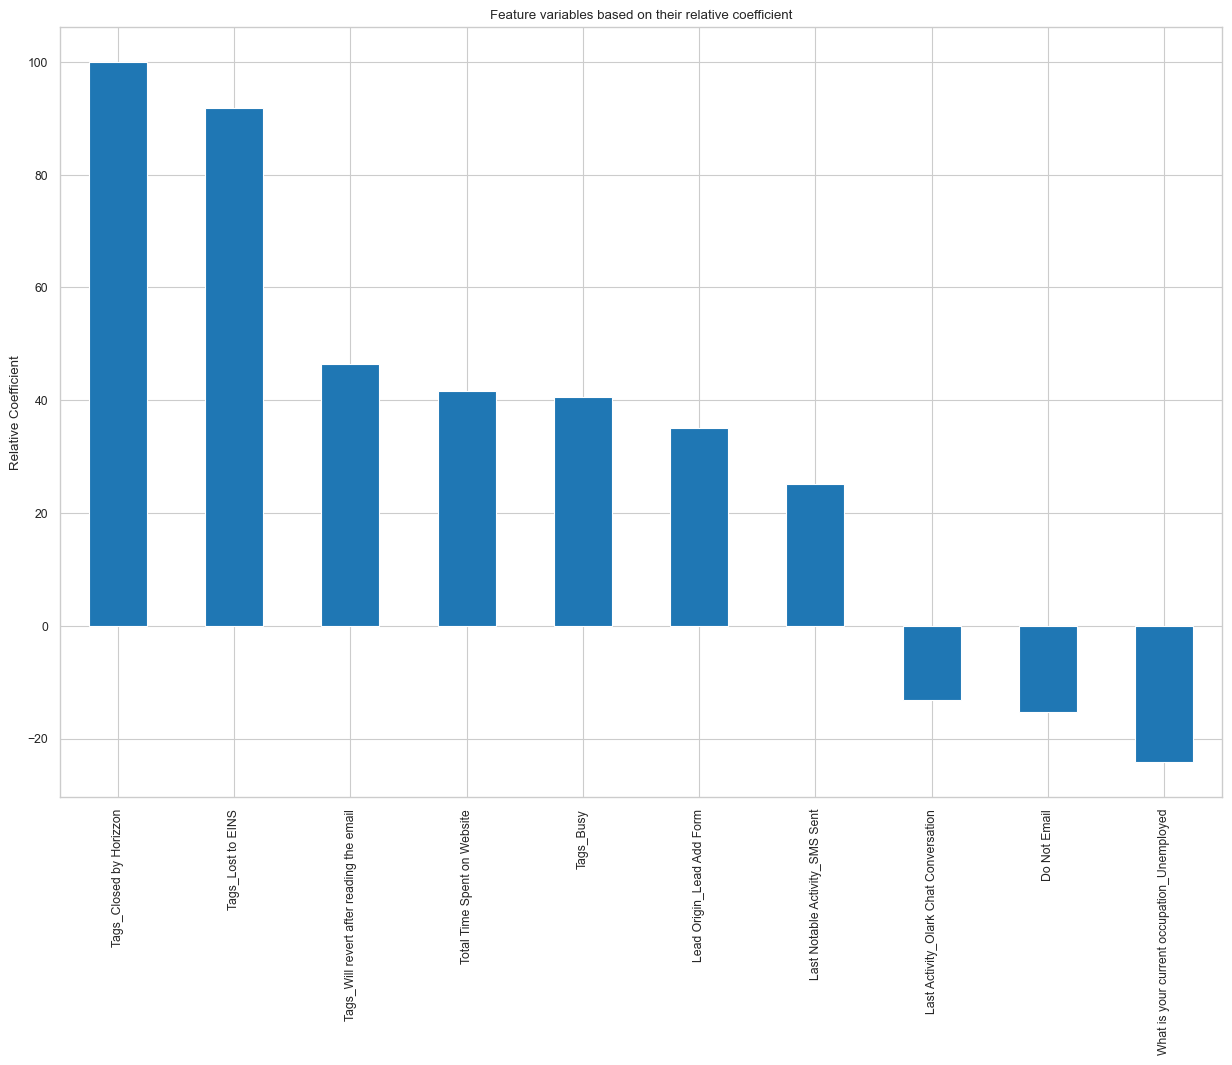

In [229]:
# Plot showing the feature variables based on their relative coefficient values
plt.figure(figsize = (15,10))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature variables based on their relative coefficient')
plt.ylabel('Relative Coefficient')
plt.show()

In [230]:
# Selecting Top 3 features which contribute most towards the probability of a lead getting converted

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

index      0
6                   Tags_Closed by Horizzon 100.00
7                         Tags_Lost to EINS  91.87
8  Tags_Will revert after reading the email  46.43

In [231]:
# Selecting Least 3 features which contribute most towards the probability of a lead getting converted

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).tail(3)

index      0
3       Last Activity_Olark Chat Conversation -13.07
0                                Do Not Email -15.32
4  What is your current occupation_Unemployed -24.15

### CONCLUSION:
After trying several models, we finally chose a model no 6 with the following characteristics:

-All variables have p-value < 0.05, showing significant features contributing towards Lead Conversion.

-All the features have very low VIF values, means hardly there is any muliticollinearity among the features. This can be seen from the heat map.

-The ROC curve has a value of 1, which is very good!

-The overall accuracy of Around 89% at a probability threshold of 0.3 on the test dataset is also acceptable.

The optimal threshold for the model is 0.33 which is calculated based on tradeoff between sensitivity, specificity and accuracy. According to business needs, this threshold can be changed to increase or decrease a specific metric.
High sensitivity ensures that most of the leads who are likely to convert are correctly predicted, while high specificity ensures that most of the leads who are not likely to convert are correctly predicted.